In [ ]:
#Data Found at: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns
from pandasql import sqldf
#from google.cloud import bigquery
pysqldf = lambda q: sqldf(q, globals())

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [22]:
data = pd.read_csv("Data/Data/Stocks/aapl.us.txt")
data

Date       Open       High        Low      Close    Volume  \
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...          ...        ...        ...        ...        ...       ...   
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241   
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877   
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166   
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086   
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494   

      OpenInt  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
8359        0  
8360        0  
8361        0  
8362        0  
8363        0  

[8364 rows x 7 columns]

In [23]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [24]:
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       OpenInt  
count   8364.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [25]:
data.isnull().any()

Date       False
Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [26]:
data.dtypes

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume       int64
OpenInt      int64
dtype: object

In [27]:
df = pd.DataFrame(data)
df

Date       Open       High        Low      Close    Volume  \
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...          ...        ...        ...        ...        ...       ...   
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241   
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877   
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166   
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086   
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494   

      OpenInt  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
8359        0  
8360        0  
8361        0  
8362        0  
8363        0  

[8364 rows x 7 columns]

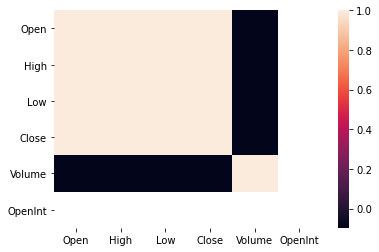

In [28]:
sns.heatmap(df.corr())
plt.show()

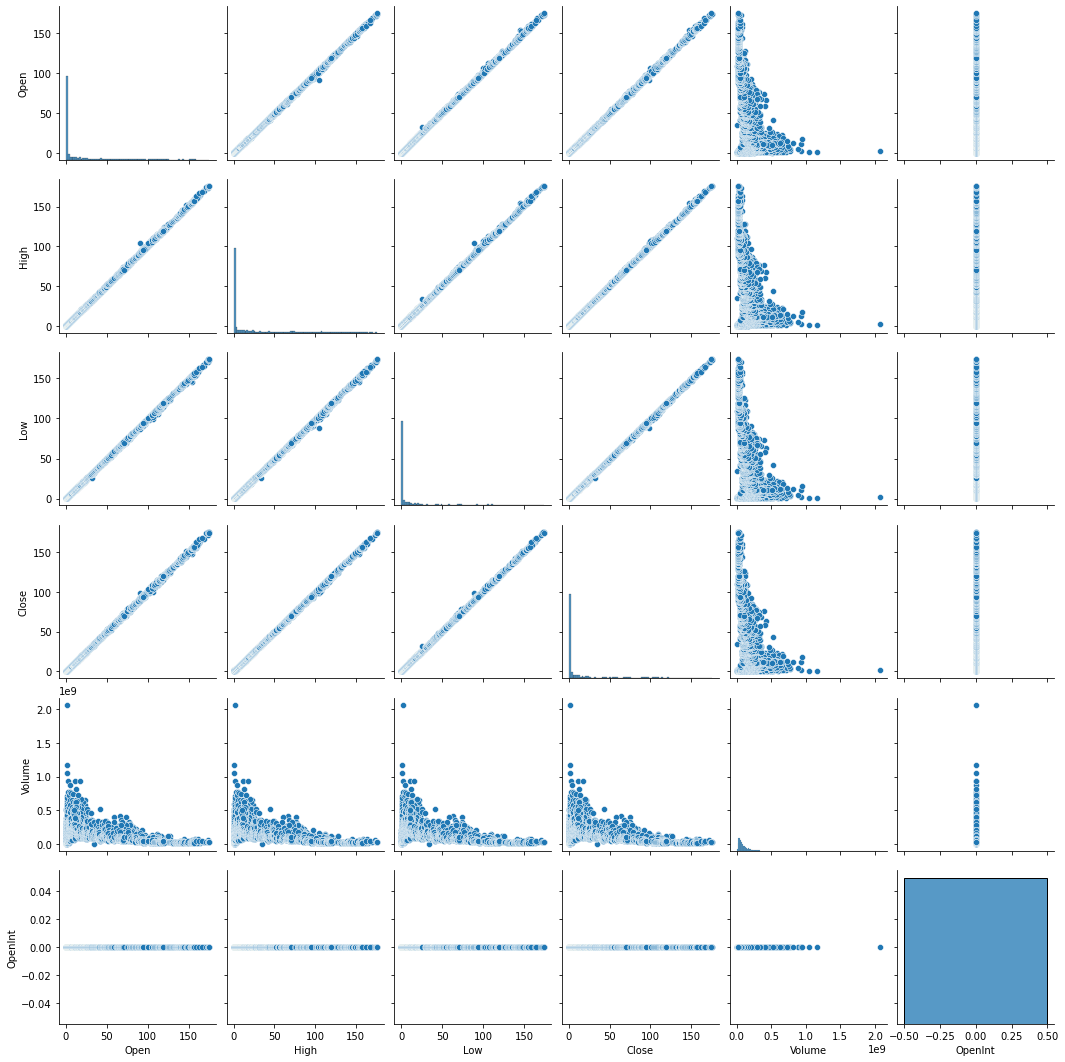

In [29]:
sns.pairplot(df)
plt.show()

In [30]:
#Data is clean, no null values
#OpenInt is dead data, 0 in every row, REMOVE

In [31]:
data.drop(['OpenInt'], axis=1, inplace=True)

In [32]:
data.describe()

Open         High          Low        Close        Volume
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09

In [33]:
data

Date       Open       High        Low      Close    Volume
0     1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030
1     1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532
2     1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199
3     1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801
4     1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062
...          ...        ...        ...        ...        ...       ...
8359  2017-11-06  171.75000  174.36000  171.10000  173.63000  34901241
8360  2017-11-07  173.29000  174.51000  173.29000  174.18000  24424877
8361  2017-11-08  174.03000  175.61000  173.71000  175.61000  24451166
8362  2017-11-09  174.48000  175.46000  172.52000  175.25000  29533086
8363  2017-11-10  175.11000  175.38000  174.27000  174.67000  25130494

[8364 rows x 6 columns]

In [34]:
#OpenInt Removed succesfully

In [35]:
#Add Calculated Feilds:
#DailyVolitility
#DayPriceChange
#WeekPriceChange
#MonthPriceChange
#6MonthPriceChange
#YearPriceChange
#3yearPriceChange

In [36]:
#Daily Price Volitility
#Mesured by the % difference the max is from the min represented in decimal format
#Max = 2
#Min = 3
#((min/max)-1)*-1
index = 0
dailyVolitility = [0.0] * len(data.index)

while (index < len(data)):
    #if(dfNYA.iloc[index, 3] == None or dfNYA.iloc[index, 4] == None):
     #   print("Missing Min or Max")
    #else:
    dailyVolitility[index] = (((data.iloc[index, 3]/data.iloc[index, 2])-1)*-1)
    #print(index)
    index += 1
    
data['DayVolitility'] = dailyVolitility

In [37]:
#Check Daily Price Volitility
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  
count    8364.000000  
mean        0.032377  
std         0.020253  
min        -0.000000  
25%         0.018601  
50%         0.028087  
75%         0.040685  
max         0.263679

In [38]:
#Daily Price Change
#Mesured by the % difference the close is from the previous day open represented in decimal format
#Close = 4
index = 1
dailyChange = [0.0] * len(data.index)

while (index < len(data)):
    if(data.iloc[index, 4] == None or data.iloc[(index -1), 4] == None):
        print("Missing Open or Close")
        dailyChange[index] = None
    else:
        dailyChange[index] = (data.iloc[index, 4]/data.iloc[(index-1), 4]) - 1
        #print(dailyChange[index])
    
    index += 1
    
data['DayPriceChange'] = dailyChange

In [39]:
#Check Daily Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  
count    8364.000000     8364.000000  
mean        0.032377        0.001131  
std         0.020253        0.028372  
min        -0.000000       -0.518463  
25%         0.018601       -0.013168  
50%         0.028087        0.000000  
75%         0.040685        0.014782  
max         0.263679        0.332121

In [40]:
#Weekly Price Change
#add calculated Price Change for (decimal) price difference 1 week into the past. +.01 is +1%
#Close = 4
#Date = 0
nextValue = 1
index = 0
pastWeekChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-7 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        pastWeekChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        pastWeekChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['WkPriceChange'] = pastWeekChange

Missing Data
1984-09-07 From 1984-08-31
Missing Data
1984-09-10 From 1984-09-03
Missing Data
1984-09-11 From 1984-09-04
Missing Data
1984-09-12 From 1984-09-05
Missing Data
1984-09-13 From 1984-09-06
Missing Data
1984-11-29 From 1984-11-22
Missing Data
1985-01-08 From 1985-01-01
Missing Data
1985-02-25 From 1985-02-18
Missing Data
1985-04-12 From 1985-04-05
Missing Data
1985-06-03 From 1985-05-27
Missing Data
1985-07-11 From 1985-07-04
Missing Data
1985-09-09 From 1985-09-02
Missing Data
1985-12-05 From 1985-11-28
Missing Data
1986-01-08 From 1986-01-01
Missing Data
1986-02-24 From 1986-02-17
Missing Data
1986-04-04 From 1986-03-28
Missing Data
1986-06-02 From 1986-05-26
Missing Data
1986-07-11 From 1986-07-04
Missing Data
1986-09-08 From 1986-09-01
Missing Data
1986-12-04 From 1986-11-27
Missing Data
1987-01-08 From 1987-01-01
Missing Data
1987-02-23 From 1987-02-16
Missing Data
1987-04-24 From 1987-04-17
Missing Data
1987-06-01 From 1987-05-25
Missing Data
1987-07-10 From 1987-07-03


Missing Data
2010-02-22 From 2010-02-15
Missing Data
2010-04-09 From 2010-04-02
Missing Data
2010-06-07 From 2010-05-31
Missing Data
2010-07-12 From 2010-07-05
Missing Data
2010-09-13 From 2010-09-06
Missing Data
2010-12-02 From 2010-11-25
Missing Data
2010-12-31 From 2010-12-24
Missing Data
2011-01-24 From 2011-01-17
Missing Data
2011-02-28 From 2011-02-21
Missing Data
2011-04-29 From 2011-04-22
Missing Data
2011-06-06 From 2011-05-30
Missing Data
2011-07-11 From 2011-07-04
Missing Data
2011-09-12 From 2011-09-05
Missing Data
2011-12-01 From 2011-11-24
Missing Data
2012-01-09 From 2012-01-02
Missing Data
2012-01-23 From 2012-01-16
Missing Data
2012-02-27 From 2012-02-20
Missing Data
2012-04-13 From 2012-04-06
Missing Data
2012-06-04 From 2012-05-28
Missing Data
2012-07-11 From 2012-07-04
Missing Data
2012-09-10 From 2012-09-03
Missing Data
2012-11-05 From 2012-10-29
Missing Data
2012-11-06 From 2012-10-30
Missing Data
2012-11-29 From 2012-11-22
Missing Data
2013-01-08 From 2013-01-01


In [41]:
#Check Weekly Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  
count    8364.000000     8364.000000    8096.000000  
mean        0.032377        0.001131       0.005158  
std         0.020253        0.028372       0.061743  
min        -0.000000       -0.518463      -0.587734  
25%         0.018601       -0.013168      -0.028630  
50%         0.028087        0.000000       0.004699  
75%         0.040685        0.014782       0.037948  
max         0.263679        0.332121       0.663815

In [42]:
#Monthly Price Change
#add calculated Price Change for (decimal) price difference 28 days into the past. +.01 is +1%
#months are considered 28 days since it's divisible by 7, producing less invalid data
#Close = 4
#Date = 0
nextValue = 1
index = 0
pastMonthChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    #Construct price change at close 28 days in the past
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-28 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        pastMonthChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        pastMonthChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['MthPriceChange'] = pastMonthChange

Missing Data
1984-09-07 From 1984-08-10
Missing Data
1984-09-10 From 1984-08-13
Missing Data
1984-09-11 From 1984-08-14
Missing Data
1984-09-12 From 1984-08-15
Missing Data
1984-09-13 From 1984-08-16
Missing Data
1984-09-14 From 1984-08-17
Missing Data
1984-09-17 From 1984-08-20
Missing Data
1984-09-18 From 1984-08-21
Missing Data
1984-09-19 From 1984-08-22
Missing Data
1984-09-20 From 1984-08-23
Missing Data
1984-09-21 From 1984-08-24
Missing Data
1984-09-24 From 1984-08-27
Missing Data
1984-09-25 From 1984-08-28
Missing Data
1984-09-26 From 1984-08-29
Missing Data
1984-09-27 From 1984-08-30
Missing Data
1984-09-28 From 1984-08-31
Missing Data
1984-10-01 From 1984-09-03
Missing Data
1984-10-02 From 1984-09-04
Missing Data
1984-10-03 From 1984-09-05
Missing Data
1984-10-04 From 1984-09-06
Missing Data
1984-12-20 From 1984-11-22
Missing Data
1985-01-22 From 1984-12-25
Missing Data
1985-01-29 From 1985-01-01
Missing Data
1985-03-18 From 1985-02-18
Missing Data
1985-05-03 From 1985-04-05


Missing Data
2007-01-29 From 2007-01-01
Missing Data
2007-01-30 From 2007-01-02
Missing Data
2007-02-12 From 2007-01-15
Missing Data
2007-03-19 From 2007-02-19
Missing Data
2007-05-04 From 2007-04-06
Missing Data
2007-06-25 From 2007-05-28
Missing Data
2007-08-01 From 2007-07-04
Missing Data
2007-10-01 From 2007-09-03
Missing Data
2007-12-20 From 2007-11-22
Missing Data
2008-01-22 From 2007-12-25
Missing Data
2008-01-29 From 2008-01-01
Missing Data
2008-03-17 From 2008-02-18
Missing Data
2008-04-18 From 2008-03-21
Missing Data
2008-06-23 From 2008-05-26
Missing Data
2008-08-01 From 2008-07-04
Missing Data
2008-09-29 From 2008-09-01
Missing Data
2009-01-22 From 2008-12-25
Missing Data
2009-01-29 From 2009-01-01
Missing Data
2009-03-16 From 2009-02-16
Missing Data
2009-05-08 From 2009-04-10
Missing Data
2009-06-22 From 2009-05-25
Missing Data
2009-07-31 From 2009-07-03
Missing Data
2009-10-05 From 2009-09-07
Missing Data
2009-12-24 From 2009-11-26
Missing Data
2010-01-22 From 2009-12-25


In [43]:
#Check Monthly Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  
count    8364.000000     8364.000000    8096.000000     8069.000000  
mean        0.032377        0.001131       0.005158        0.022256  
std         0.020253        0.028372       0.061743        0.124743  
min        -0.000000       -0.518463      -0.587734       -0.670377  
25%         0.018601       -0.013168      -0.028630       -0.049719  
50%         0.028087        0.000000       0.004699        0.019630  
75%         0.040685        0.014782       0.037948        0.094461  
max         0.263679        0.332121       0.663815        1.202038

In [44]:
#6-Month Price Change
#add calculated Price Change for (decimal) price difference 183 days into the past. +.01 is +1%
#182 days since it's divisible by 7, less missing data from absent weekend entries
#this is off from the actual half year by .525 days, but it is insignificant in this application
#Close = 4
#Date = 0
nextValue = 1
index = 0
past6MonthChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    #Construct price change at close 182 days in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-182 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        past6MonthChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        past6MonthChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['SixMthPriceChange'] = past6MonthChange

Missing Data
1984-09-07 From 1984-03-09
Missing Data
1984-09-10 From 1984-03-12
Missing Data
1984-09-11 From 1984-03-13
Missing Data
1984-09-12 From 1984-03-14
Missing Data
1984-09-13 From 1984-03-15
Missing Data
1984-09-14 From 1984-03-16
Missing Data
1984-09-17 From 1984-03-19
Missing Data
1984-09-18 From 1984-03-20
Missing Data
1984-09-19 From 1984-03-21
Missing Data
1984-09-20 From 1984-03-22
Missing Data
1984-09-21 From 1984-03-23
Missing Data
1984-09-24 From 1984-03-26
Missing Data
1984-09-25 From 1984-03-27
Missing Data
1984-09-26 From 1984-03-28
Missing Data
1984-09-27 From 1984-03-29
Missing Data
1984-09-28 From 1984-03-30
Missing Data
1984-10-01 From 1984-04-02
Missing Data
1984-10-02 From 1984-04-03
Missing Data
1984-10-03 From 1984-04-04
Missing Data
1984-10-04 From 1984-04-05
Missing Data
1984-10-05 From 1984-04-06
Missing Data
1984-10-08 From 1984-04-09
Missing Data
1984-10-09 From 1984-04-10
Missing Data
1984-10-10 From 1984-04-11
Missing Data
1984-10-11 From 1984-04-12


Missing Data
1995-08-21 From 1995-02-20
Missing Data
1995-10-13 From 1995-04-14
Missing Data
1995-11-27 From 1995-05-29
Missing Data
1996-01-02 From 1995-07-04
Missing Data
1996-03-04 From 1995-09-04
Missing Data
1996-05-23 From 1995-11-23
Missing Data
1996-06-24 From 1995-12-25
Missing Data
1996-07-01 From 1996-01-01
Missing Data
1996-08-19 From 1996-02-19
Missing Data
1996-10-04 From 1996-04-05
Missing Data
1996-11-25 From 1996-05-27
Missing Data
1997-01-02 From 1996-07-04
Missing Data
1997-03-03 From 1996-09-02
Missing Data
1997-05-29 From 1996-11-28
Missing Data
1997-06-25 From 1996-12-25
Missing Data
1997-07-02 From 1997-01-01
Missing Data
1997-08-18 From 1997-02-17
Missing Data
1997-09-26 From 1997-03-28
Missing Data
1997-11-24 From 1997-05-26
Missing Data
1998-01-02 From 1997-07-04
Missing Data
1998-03-02 From 1997-09-01
Missing Data
1998-05-28 From 1997-11-27
Missing Data
1998-06-25 From 1997-12-25
Missing Data
1998-07-02 From 1998-01-01
Missing Data
1998-07-20 From 1998-01-19


In [45]:
#Check 6-Month Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    8364.000000     8364.000000    8096.000000     8069.000000   
mean        0.032377        0.001131       0.005158        0.022256   
std         0.020253        0.028372       0.061743        0.124743   
min        -0.000000       -0.518463      -0.587734       -0.670377   
25%         0.018601       -0.013168      -0.028630       -0.049719   
50%         0.028087        0.000000       0.004699        0.019630   
75%         0.040685        0.014782       0.037948        0.094461   
max         0.263679        0.332121       0.663815        1.202038   

       SixMthPriceChange  
count        7960.000000  
mean            0.155445  
std             0.375500  
min            -0.741429  
25%            -0.089373  
50%             0.139870  
75%             0.331751  
max             1.862742

In [46]:
#year Price Change
#add calculated Price Change for (decimal) price difference 364 days into the past. +.01 is +1%
#364 days since it's divisible by 7, less missing data from absent weekend entries
#Close = 4
#Date = 0
nextValue = 1
index = 0
pastYearChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-364 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        pastYearChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        pastYearChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['YrPriceChange'] = pastYearChange

Missing Data
1984-09-07 From 1983-09-09
Missing Data
1984-09-10 From 1983-09-12
Missing Data
1984-09-11 From 1983-09-13
Missing Data
1984-09-12 From 1983-09-14
Missing Data
1984-09-13 From 1983-09-15
Missing Data
1984-09-14 From 1983-09-16
Missing Data
1984-09-17 From 1983-09-19
Missing Data
1984-09-18 From 1983-09-20
Missing Data
1984-09-19 From 1983-09-21
Missing Data
1984-09-20 From 1983-09-22
Missing Data
1984-09-21 From 1983-09-23
Missing Data
1984-09-24 From 1983-09-26
Missing Data
1984-09-25 From 1983-09-27
Missing Data
1984-09-26 From 1983-09-28
Missing Data
1984-09-27 From 1983-09-29
Missing Data
1984-09-28 From 1983-09-30
Missing Data
1984-10-01 From 1983-10-03
Missing Data
1984-10-02 From 1983-10-04
Missing Data
1984-10-03 From 1983-10-05
Missing Data
1984-10-04 From 1983-10-06
Missing Data
1984-10-05 From 1983-10-07
Missing Data
1984-10-08 From 1983-10-10
Missing Data
1984-10-09 From 1983-10-11
Missing Data
1984-10-10 From 1983-10-12
Missing Data
1984-10-11 From 1983-10-13


Missing Data
1985-07-02 From 1984-07-03
Missing Data
1985-07-03 From 1984-07-04
Missing Data
1985-07-05 From 1984-07-06
Missing Data
1985-07-08 From 1984-07-09
Missing Data
1985-07-09 From 1984-07-10
Missing Data
1985-07-10 From 1984-07-11
Missing Data
1985-07-11 From 1984-07-12
Missing Data
1985-07-12 From 1984-07-13
Missing Data
1985-07-15 From 1984-07-16
Missing Data
1985-07-16 From 1984-07-17
Missing Data
1985-07-17 From 1984-07-18
Missing Data
1985-07-18 From 1984-07-19
Missing Data
1985-07-19 From 1984-07-20
Missing Data
1985-07-22 From 1984-07-23
Missing Data
1985-07-23 From 1984-07-24
Missing Data
1985-07-24 From 1984-07-25
Missing Data
1985-07-25 From 1984-07-26
Missing Data
1985-07-26 From 1984-07-27
Missing Data
1985-07-29 From 1984-07-30
Missing Data
1985-07-30 From 1984-07-31
Missing Data
1985-07-31 From 1984-08-01
Missing Data
1985-08-01 From 1984-08-02
Missing Data
1985-08-02 From 1984-08-03
Missing Data
1985-08-05 From 1984-08-06
Missing Data
1985-08-06 From 1984-08-07


In [47]:
#Check Year Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    8364.000000     8364.000000    8096.000000     8069.000000   
mean        0.032377        0.001131       0.005158        0.022256   
std         0.020253        0.028372       0.061743        0.124743   
min        -0.000000       -0.518463      -0.587734       -0.670377   
25%         0.018601       -0.013168      -0.028630       -0.049719   
50%         0.028087        0.000000       0.004699        0.019630   
75%         0.040685        0.014782       0.037948        0.094461   
max         0.263679        0.332121       0.663815        1.202038   

       SixMthPriceChange  YrPriceChange  
count        7960.000000    7966.000000  
mean            0.155445       0.343255  
std             0.375500       0.624632  
min            -0.741429      -0.739771  
25%            -0.089373      -0.141766  
50%             0.139870       0.266486  
75%             0.331751       0.648709  
max             1.862742       3.281065

In [48]:
#2year Price Change
#add calculated Price Change for (decimal) price difference 728 days into the past. +.01 is +1%
#728 days since it's divisible by 7, less missing data from absent weekend entries
#Close = 4
#Date = 0
nextValue = 1
index = 0
past2YearChange = [0.0] * len(data.index)

#data.iloc[0,1]
while nextValue == 1 and index <= len(data.index) - 1:
    
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('-728 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(OriginalDate + " From " + TargetDate)
        past2YearChange[index] = None
    else:
        #print(FW2.iloc[0,0])
        #print(FW1.iloc[0,0])
        #print((FW1.iloc[0,0]/FW2.iloc[0,0]) - 1)
        past2YearChange[index] = (FW1.iloc[0,0]/FW2.iloc[0,0]) - 1
    index += 1
    
    
data['TwoYrPriceChange'] = past2YearChange

Missing Data
1984-09-07 From 1982-09-10
Missing Data
1984-09-10 From 1982-09-13
Missing Data
1984-09-11 From 1982-09-14
Missing Data
1984-09-12 From 1982-09-15
Missing Data
1984-09-13 From 1982-09-16
Missing Data
1984-09-14 From 1982-09-17
Missing Data
1984-09-17 From 1982-09-20
Missing Data
1984-09-18 From 1982-09-21
Missing Data
1984-09-19 From 1982-09-22
Missing Data
1984-09-20 From 1982-09-23
Missing Data
1984-09-21 From 1982-09-24
Missing Data
1984-09-24 From 1982-09-27
Missing Data
1984-09-25 From 1982-09-28
Missing Data
1984-09-26 From 1982-09-29
Missing Data
1984-09-27 From 1982-09-30
Missing Data
1984-09-28 From 1982-10-01
Missing Data
1984-10-01 From 1982-10-04
Missing Data
1984-10-02 From 1982-10-05
Missing Data
1984-10-03 From 1982-10-06
Missing Data
1984-10-04 From 1982-10-07
Missing Data
1984-10-05 From 1982-10-08
Missing Data
1984-10-08 From 1982-10-11
Missing Data
1984-10-09 From 1982-10-12
Missing Data
1984-10-10 From 1982-10-13
Missing Data
1984-10-11 From 1982-10-14


Missing Data
1985-07-02 From 1983-07-05
Missing Data
1985-07-03 From 1983-07-06
Missing Data
1985-07-05 From 1983-07-08
Missing Data
1985-07-08 From 1983-07-11
Missing Data
1985-07-09 From 1983-07-12
Missing Data
1985-07-10 From 1983-07-13
Missing Data
1985-07-11 From 1983-07-14
Missing Data
1985-07-12 From 1983-07-15
Missing Data
1985-07-15 From 1983-07-18
Missing Data
1985-07-16 From 1983-07-19
Missing Data
1985-07-17 From 1983-07-20
Missing Data
1985-07-18 From 1983-07-21
Missing Data
1985-07-19 From 1983-07-22
Missing Data
1985-07-22 From 1983-07-25
Missing Data
1985-07-23 From 1983-07-26
Missing Data
1985-07-24 From 1983-07-27
Missing Data
1985-07-25 From 1983-07-28
Missing Data
1985-07-26 From 1983-07-29
Missing Data
1985-07-29 From 1983-08-01
Missing Data
1985-07-30 From 1983-08-02
Missing Data
1985-07-31 From 1983-08-03
Missing Data
1985-08-01 From 1983-08-04
Missing Data
1985-08-02 From 1983-08-05
Missing Data
1985-08-05 From 1983-08-08
Missing Data
1985-08-06 From 1983-08-09


Missing Data
1986-04-25 From 1984-04-27
Missing Data
1986-04-28 From 1984-04-30
Missing Data
1986-04-29 From 1984-05-01
Missing Data
1986-04-30 From 1984-05-02
Missing Data
1986-05-01 From 1984-05-03
Missing Data
1986-05-02 From 1984-05-04
Missing Data
1986-05-05 From 1984-05-07
Missing Data
1986-05-06 From 1984-05-08
Missing Data
1986-05-07 From 1984-05-09
Missing Data
1986-05-08 From 1984-05-10
Missing Data
1986-05-09 From 1984-05-11
Missing Data
1986-05-12 From 1984-05-14
Missing Data
1986-05-13 From 1984-05-15
Missing Data
1986-05-14 From 1984-05-16
Missing Data
1986-05-15 From 1984-05-17
Missing Data
1986-05-16 From 1984-05-18
Missing Data
1986-05-19 From 1984-05-21
Missing Data
1986-05-20 From 1984-05-22
Missing Data
1986-05-21 From 1984-05-23
Missing Data
1986-05-22 From 1984-05-24
Missing Data
1986-05-23 From 1984-05-25
Missing Data
1986-05-27 From 1984-05-29
Missing Data
1986-05-28 From 1984-05-30
Missing Data
1986-05-29 From 1984-05-31
Missing Data
1986-05-30 From 1984-06-01


Missing Data
2005-08-29 From 2003-09-01
Missing Data
2005-12-22 From 2003-12-25
Missing Data
2005-12-29 From 2004-01-01
Missing Data
2006-02-13 From 2004-02-16
Missing Data
2006-04-07 From 2004-04-09
Missing Data
2006-06-09 From 2004-06-11
Missing Data
2006-07-03 From 2004-07-05
Missing Data
2006-12-22 From 2004-12-24
Missing Data
2007-03-23 From 2005-03-25
Missing Data
2007-07-02 From 2005-07-04
Missing Data
2007-12-24 From 2005-12-26
Missing Data
2007-12-31 From 2006-01-02
Missing Data
2008-01-14 From 2006-01-16
Missing Data
2008-04-11 From 2006-04-14
Missing Data
2008-07-01 From 2006-07-04
Missing Data
2008-11-20 From 2006-11-23
Missing Data
2008-12-22 From 2006-12-25
Missing Data
2008-12-29 From 2007-01-01
Missing Data
2008-12-30 From 2007-01-02
Missing Data
2009-01-12 From 2007-01-15
Missing Data
2009-04-03 From 2007-04-06
Missing Data
2009-07-01 From 2007-07-04
Missing Data
2009-08-31 From 2007-09-03
Missing Data
2009-11-19 From 2007-11-22
Missing Data
2009-12-22 From 2007-12-25


In [49]:
#Check 2 Year Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    8364.000000     8364.000000    8096.000000     8069.000000   
mean        0.032377        0.001131       0.005158        0.022256   
std         0.020253        0.028372       0.061743        0.124743   
min        -0.000000       -0.518463      -0.587734       -0.670377   
25%         0.018601       -0.013168      -0.028630       -0.049719   
50%         0.028087        0.000000       0.004699        0.019630   
75%         0.040685        0.014782       0.037948        0.094461   
max         0.263679        0.332121       0.663815        1.202038   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  
count        7960.000000    7966.000000       7676.000000  
mean            0.155445       0.343255          0.822125  
std             0.375500       0.624632          1.345676  
min            -0.741429      -0.739771         -0.774762  
25%            -0.089373      -0.141766         -0.034785  
50%             0.139870       0.266486          0.333806  
75%             0.331751       0.648709          1.353711  
max             1.862742       3.281065          6.931635

In [50]:
#add calculated Price Change for (decimal) price difference 1 week into the future. +.01 is +1% gained by next week
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureWeekChange = [0.0] * len(data.index)
missingWkChange = 0;

while nextValue == 1 and index <= (len(data) - 7):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('7 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingWkChange += 1
        futureWeekChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureWeekChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutWkPriceChange'] = futureWeekChange

Missing Data
1984-11-22 From 1984-11-15
Missing Data
1984-12-25 From 1984-12-18
Missing Data
1985-02-18 From 1985-02-11
Missing Data
1985-04-05 From 1985-03-29
Missing Data
1985-05-27 From 1985-05-20
Missing Data
1985-07-04 From 1985-06-27
Missing Data
1985-09-02 From 1985-08-26
Missing Data
1985-11-28 From 1985-11-21
Missing Data
1985-12-25 From 1985-12-18
Missing Data
1986-02-17 From 1986-02-10
Missing Data
1986-03-28 From 1986-03-21
Missing Data
1986-05-26 From 1986-05-19
Missing Data
1986-07-04 From 1986-06-27
Missing Data
1986-09-01 From 1986-08-25
Missing Data
1986-11-27 From 1986-11-20
Missing Data
1986-12-25 From 1986-12-18
Missing Data
1987-02-16 From 1987-02-09
Missing Data
1987-04-17 From 1987-04-10
Missing Data
1987-05-25 From 1987-05-18
Missing Data
1987-07-03 From 1987-06-26
Missing Data
1987-09-07 From 1987-08-31
Missing Data
1987-11-26 From 1987-11-19
Missing Data
1987-12-25 From 1987-12-18
Missing Data
1988-02-15 From 1988-02-08
Missing Data
1988-04-01 From 1988-03-25


Missing Data
2010-11-25 From 2010-11-18
Missing Data
2010-12-24 From 2010-12-17
Missing Data
2011-01-17 From 2011-01-10
Missing Data
2011-02-21 From 2011-02-14
Missing Data
2011-04-22 From 2011-04-15
Missing Data
2011-05-30 From 2011-05-23
Missing Data
2011-07-04 From 2011-06-27
Missing Data
2011-09-05 From 2011-08-29
Missing Data
2011-11-24 From 2011-11-17
Missing Data
2011-12-26 From 2011-12-19
Missing Data
2012-01-16 From 2012-01-09
Missing Data
2012-02-20 From 2012-02-13
Missing Data
2012-04-06 From 2012-03-30
Missing Data
2012-05-28 From 2012-05-21
Missing Data
2012-07-04 From 2012-06-27
Missing Data
2012-09-03 From 2012-08-27
Missing Data
2012-10-29 From 2012-10-22
Missing Data
2012-10-30 From 2012-10-23
Missing Data
2012-11-22 From 2012-11-15
Missing Data
2012-12-25 From 2012-12-18
Missing Data
2013-01-21 From 2013-01-14
Missing Data
2013-02-18 From 2013-02-11
Missing Data
2013-03-29 From 2013-03-22
Missing Data
2013-05-27 From 2013-05-20
Missing Data
2013-07-04 From 2013-06-27


In [51]:
#Check Future Week Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    8364.000000     8364.000000    8096.000000     8069.000000   
mean        0.032377        0.001131       0.005158        0.022256   
std         0.020253        0.028372       0.061743        0.124743   
min        -0.000000       -0.518463      -0.587734       -0.670377   
25%         0.018601       -0.013168      -0.028630       -0.049719   
50%         0.028087        0.000000       0.004699        0.019630   
75%         0.040685        0.014782       0.037948        0.094461   
max         0.263679        0.332121       0.663815        1.202038   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  
count        7960.000000    7966.000000       7676.000000       8101.000000  
mean            0.155445       0.343255          0.822125          0.005153  
std             0.375500       0.624632          1.345676          0.061724  
min            -0.741429      -0.739771         -0.774762         -0.587734  
25%            -0.089373      -0.141766         -0.034785         -0.028622  
50%             0.139870       0.266486          0.333806          0.004667  
75%             0.331751       0.648709          1.353711          0.037943  
max             1.862742       3.281065          6.931635          0.663815

In [52]:
#add calculated Price Change for (decimal) price difference 1 month into the future. +.01 is +1% gained
#Month = 28 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureMonthChange = [0.0] * len(data.index)
missingMonthChange = 0;

while nextValue == 1 and index <= (len(data) - 28):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('28 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingMonthChange += 1
        futureMonthChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureMonthChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutMthPriceChange'] = futureMonthChange

Missing Data
1984-11-22 From 1984-10-25
Missing Data
1984-12-25 From 1984-11-27
Missing Data
1985-01-01 From 1984-12-04
Missing Data
1985-02-18 From 1985-01-21
Missing Data
1985-04-05 From 1985-03-08
Missing Data
1985-05-27 From 1985-04-29
Missing Data
1985-07-04 From 1985-06-06
Missing Data
1985-09-02 From 1985-08-05
Missing Data
1985-11-28 From 1985-10-31
Missing Data
1985-12-25 From 1985-11-27
Missing Data
1986-01-01 From 1985-12-04
Missing Data
1986-02-17 From 1986-01-20
Missing Data
1986-03-28 From 1986-02-28
Missing Data
1986-05-26 From 1986-04-28
Missing Data
1986-07-04 From 1986-06-06
Missing Data
1986-09-01 From 1986-08-04
Missing Data
1986-11-27 From 1986-10-30
Missing Data
1987-01-01 From 1986-12-04
Missing Data
1987-02-16 From 1987-01-19
Missing Data
1987-04-17 From 1987-03-20
Missing Data
1987-05-25 From 1987-04-27
Missing Data
1987-07-03 From 1987-06-05
Missing Data
1987-09-07 From 1987-08-10
Missing Data
1987-11-26 From 1987-10-29
Missing Data
1987-12-25 From 1987-11-27


Missing Data
2009-05-25 From 2009-04-27
Missing Data
2009-07-03 From 2009-06-05
Missing Data
2009-09-07 From 2009-08-10
Missing Data
2009-11-26 From 2009-10-29
Missing Data
2009-12-25 From 2009-11-27
Missing Data
2010-01-01 From 2009-12-04
Missing Data
2010-01-18 From 2009-12-21
Missing Data
2010-04-02 From 2010-03-05
Missing Data
2010-05-31 From 2010-05-03
Missing Data
2010-07-05 From 2010-06-07
Missing Data
2010-09-06 From 2010-08-09
Missing Data
2010-11-25 From 2010-10-28
Missing Data
2010-12-24 From 2010-11-26
Missing Data
2011-01-17 From 2010-12-20
Missing Data
2011-02-21 From 2011-01-24
Missing Data
2011-04-22 From 2011-03-25
Missing Data
2011-05-30 From 2011-05-02
Missing Data
2011-07-04 From 2011-06-06
Missing Data
2011-09-05 From 2011-08-08
Missing Data
2011-11-24 From 2011-10-27
Missing Data
2011-12-26 From 2011-11-28
Missing Data
2012-01-02 From 2011-12-05
Missing Data
2012-01-16 From 2011-12-19
Missing Data
2012-02-20 From 2012-01-23
Missing Data
2012-04-06 From 2012-03-09


In [53]:
#Check Future Month Price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    8364.000000     8364.000000    8096.000000     8069.000000   
mean        0.032377        0.001131       0.005158        0.022256   
std         0.020253        0.028372       0.061743        0.124743   
min        -0.000000       -0.518463      -0.587734       -0.670377   
25%         0.018601       -0.013168      -0.028630       -0.049719   
50%         0.028087        0.000000       0.004699        0.019630   
75%         0.040685        0.014782       0.037948        0.094461   
max         0.263679        0.332121       0.663815        1.202038   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
count        7960.000000    7966.000000       7676.000000       8101.000000   
mean            0.155445       0.343255          0.822125          0.005153   
std             0.375500       0.624632          1.345676          0.061724   
min            -0.741429      -0.739771         -0.774762         -0.587734   
25%            -0.089373      -0.141766         -0.034785         -0.028622   
50%             0.139870       0.266486          0.333806          0.004667   
75%             0.331751       0.648709          1.353711          0.037943   
max             1.862742       3.281065          6.931635          0.663815   

       FutMthPriceChange  
count        8089.000000  
mean            0.022102  
std             0.124565  
min            -0.670377  
25%            -0.049600  
50%             0.019138  
75%             0.093644  
max             1.202038

In [54]:
#add calculated Price Change for (decimal) price difference 6 months into the future. +.01 is +1% gained 
#6Month = 183 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
future6MonthChange = [0.0] * len(data.index)
missing6MonthChange = 0;

while nextValue == 1 and index <= (len(data) - 183):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('183 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missing6MonthChange += 1
        future6MonthChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        future6MonthChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutSixMthPriceChange'] = future6MonthChange

Missing Data
1985-03-09 From 1984-09-07
Missing Data
1985-03-16 From 1984-09-14
Missing Data
1985-03-23 From 1984-09-21
Missing Data
1985-03-30 From 1984-09-28
Missing Data
1985-04-05 From 1984-10-04
Missing Data
1985-04-06 From 1984-10-05
Missing Data
1985-04-13 From 1984-10-12
Missing Data
1985-04-20 From 1984-10-19
Missing Data
1985-04-27 From 1984-10-26
Missing Data
1985-05-04 From 1984-11-02
Missing Data
1985-05-11 From 1984-11-09
Missing Data
1985-05-18 From 1984-11-16
Missing Data
1985-05-25 From 1984-11-23
Missing Data
1985-06-01 From 1984-11-30
Missing Data
1985-06-08 From 1984-12-07
Missing Data
1985-06-15 From 1984-12-14
Missing Data
1985-06-22 From 1984-12-21
Missing Data
1985-06-29 From 1984-12-28
Missing Data
1985-07-04 From 1985-01-02
Missing Data
1985-07-06 From 1985-01-04
Missing Data
1985-07-13 From 1985-01-11
Missing Data
1985-07-20 From 1985-01-18
Missing Data
1985-07-27 From 1985-01-25
Missing Data
1985-08-03 From 1985-02-01
Missing Data
1985-08-10 From 1985-02-08


Missing Data
1988-12-17 From 1988-06-17
Missing Data
1988-12-24 From 1988-06-24
Missing Data
1988-12-31 From 1988-07-01
Missing Data
1989-01-07 From 1988-07-08
Missing Data
1989-01-14 From 1988-07-15
Missing Data
1989-01-21 From 1988-07-22
Missing Data
1989-01-28 From 1988-07-29
Missing Data
1989-02-04 From 1988-08-05
Missing Data
1989-02-11 From 1988-08-12
Missing Data
1989-02-18 From 1988-08-19
Missing Data
1989-02-25 From 1988-08-26
Missing Data
1989-03-04 From 1988-09-02
Missing Data
1989-03-11 From 1988-09-09
Missing Data
1989-03-18 From 1988-09-16
Missing Data
1989-03-24 From 1988-09-22
Missing Data
1989-03-25 From 1988-09-23
Missing Data
1989-04-01 From 1988-09-30
Missing Data
1989-04-08 From 1988-10-07
Missing Data
1989-04-15 From 1988-10-14
Missing Data
1989-04-22 From 1988-10-21
Missing Data
1989-04-29 From 1988-10-28
Missing Data
1989-05-06 From 1988-11-04
Missing Data
1989-05-13 From 1988-11-11
Missing Data
1989-05-20 From 1988-11-18
Missing Data
1989-05-27 From 1988-11-25


Missing Data
1992-09-05 From 1992-03-06
Missing Data
1992-09-12 From 1992-03-13
Missing Data
1992-09-19 From 1992-03-20
Missing Data
1992-09-26 From 1992-03-27
Missing Data
1992-10-03 From 1992-04-03
Missing Data
1992-10-10 From 1992-04-10
Missing Data
1992-10-24 From 1992-04-24
Missing Data
1992-10-31 From 1992-05-01
Missing Data
1992-11-07 From 1992-05-08
Missing Data
1992-11-14 From 1992-05-15
Missing Data
1992-11-21 From 1992-05-22
Missing Data
1992-11-26 From 1992-05-27
Missing Data
1992-11-28 From 1992-05-29
Missing Data
1992-12-05 From 1992-06-05
Missing Data
1992-12-12 From 1992-06-12
Missing Data
1992-12-19 From 1992-06-19
Missing Data
1992-12-25 From 1992-06-25
Missing Data
1992-12-26 From 1992-06-26
Missing Data
1993-01-01 From 1992-07-02
Missing Data
1993-01-09 From 1992-07-10
Missing Data
1993-01-16 From 1992-07-17
Missing Data
1993-01-23 From 1992-07-24
Missing Data
1993-01-30 From 1992-07-31
Missing Data
1993-02-06 From 1992-08-07
Missing Data
1993-02-13 From 1992-08-14


Missing Data
1996-07-06 From 1996-01-05
Missing Data
1996-07-13 From 1996-01-12
Missing Data
1996-07-20 From 1996-01-19
Missing Data
1996-07-27 From 1996-01-26
Missing Data
1996-08-03 From 1996-02-02
Missing Data
1996-08-10 From 1996-02-09
Missing Data
1996-08-17 From 1996-02-16
Missing Data
1996-08-24 From 1996-02-23
Missing Data
1996-08-31 From 1996-03-01
Missing Data
1996-09-07 From 1996-03-08
Missing Data
1996-09-14 From 1996-03-15
Missing Data
1996-09-21 From 1996-03-22
Missing Data
1996-09-28 From 1996-03-29
Missing Data
1996-10-12 From 1996-04-12
Missing Data
1996-10-19 From 1996-04-19
Missing Data
1996-10-26 From 1996-04-26
Missing Data
1996-11-02 From 1996-05-03
Missing Data
1996-11-09 From 1996-05-10
Missing Data
1996-11-16 From 1996-05-17
Missing Data
1996-11-23 From 1996-05-24
Missing Data
1996-11-28 From 1996-05-29
Missing Data
1996-11-30 From 1996-05-31
Missing Data
1996-12-07 From 1996-06-07
Missing Data
1996-12-14 From 1996-06-14
Missing Data
1996-12-21 From 1996-06-21


Missing Data
2000-04-15 From 1999-10-15
Missing Data
2000-04-21 From 1999-10-21
Missing Data
2000-04-22 From 1999-10-22
Missing Data
2000-04-29 From 1999-10-29
Missing Data
2000-05-06 From 1999-11-05
Missing Data
2000-05-13 From 1999-11-12
Missing Data
2000-05-20 From 1999-11-19
Missing Data
2000-05-27 From 1999-11-26
Missing Data
2000-06-03 From 1999-12-03
Missing Data
2000-06-10 From 1999-12-10
Missing Data
2000-06-17 From 1999-12-17
Missing Data
2000-07-01 From 1999-12-31
Missing Data
2000-07-04 From 2000-01-03
Missing Data
2000-07-08 From 2000-01-07
Missing Data
2000-07-15 From 2000-01-14
Missing Data
2000-07-22 From 2000-01-21
Missing Data
2000-07-29 From 2000-01-28
Missing Data
2000-08-05 From 2000-02-04
Missing Data
2000-08-12 From 2000-02-11
Missing Data
2000-08-19 From 2000-02-18
Missing Data
2000-08-26 From 2000-02-25
Missing Data
2000-09-02 From 2000-03-03
Missing Data
2000-09-09 From 2000-03-10
Missing Data
2000-09-16 From 2000-03-17
Missing Data
2000-09-23 From 2000-03-24


Missing Data
2003-12-13 From 2003-06-13
Missing Data
2003-12-20 From 2003-06-20
Missing Data
2003-12-25 From 2003-06-25
Missing Data
2003-12-27 From 2003-06-27
Missing Data
2004-01-01 From 2003-07-02
Missing Data
2004-01-10 From 2003-07-11
Missing Data
2004-01-17 From 2003-07-18
Missing Data
2004-01-24 From 2003-07-25
Missing Data
2004-01-31 From 2003-08-01
Missing Data
2004-02-07 From 2003-08-08
Missing Data
2004-02-14 From 2003-08-15
Missing Data
2004-02-21 From 2003-08-22
Missing Data
2004-02-28 From 2003-08-29
Missing Data
2004-03-06 From 2003-09-05
Missing Data
2004-03-13 From 2003-09-12
Missing Data
2004-03-20 From 2003-09-19
Missing Data
2004-03-27 From 2003-09-26
Missing Data
2004-04-03 From 2003-10-03
Missing Data
2004-04-09 From 2003-10-09
Missing Data
2004-04-10 From 2003-10-10
Missing Data
2004-04-17 From 2003-10-17
Missing Data
2004-04-24 From 2003-10-24
Missing Data
2004-05-01 From 2003-10-31
Missing Data
2004-05-08 From 2003-11-07
Missing Data
2004-05-15 From 2003-11-14


Missing Data
2007-10-13 From 2007-04-13
Missing Data
2007-10-20 From 2007-04-20
Missing Data
2007-10-27 From 2007-04-27
Missing Data
2007-11-03 From 2007-05-04
Missing Data
2007-11-10 From 2007-05-11
Missing Data
2007-11-17 From 2007-05-18
Missing Data
2007-11-22 From 2007-05-23
Missing Data
2007-11-24 From 2007-05-25
Missing Data
2007-12-01 From 2007-06-01
Missing Data
2007-12-08 From 2007-06-08
Missing Data
2007-12-15 From 2007-06-15
Missing Data
2007-12-22 From 2007-06-22
Missing Data
2007-12-25 From 2007-06-25
Missing Data
2007-12-29 From 2007-06-29
Missing Data
2008-01-01 From 2007-07-02
Missing Data
2008-01-05 From 2007-07-06
Missing Data
2008-01-12 From 2007-07-13
Missing Data
2008-01-19 From 2007-07-20
Missing Data
2008-01-26 From 2007-07-27
Missing Data
2008-02-02 From 2007-08-03
Missing Data
2008-02-09 From 2007-08-10
Missing Data
2008-02-16 From 2007-08-17
Missing Data
2008-02-23 From 2007-08-24
Missing Data
2008-03-01 From 2007-08-31
Missing Data
2008-03-08 From 2007-09-07


Missing Data
2011-07-23 From 2011-01-21
Missing Data
2011-07-30 From 2011-01-28
Missing Data
2011-08-06 From 2011-02-04
Missing Data
2011-08-13 From 2011-02-11
Missing Data
2011-08-20 From 2011-02-18
Missing Data
2011-08-27 From 2011-02-25
Missing Data
2011-09-03 From 2011-03-04
Missing Data
2011-09-10 From 2011-03-11
Missing Data
2011-09-17 From 2011-03-18
Missing Data
2011-09-24 From 2011-03-25
Missing Data
2011-10-01 From 2011-04-01
Missing Data
2011-10-08 From 2011-04-08
Missing Data
2011-10-15 From 2011-04-15
Missing Data
2011-10-29 From 2011-04-29
Missing Data
2011-11-05 From 2011-05-06
Missing Data
2011-11-12 From 2011-05-13
Missing Data
2011-11-19 From 2011-05-20
Missing Data
2011-11-24 From 2011-05-25
Missing Data
2011-11-26 From 2011-05-27
Missing Data
2011-12-03 From 2011-06-03
Missing Data
2011-12-10 From 2011-06-10
Missing Data
2011-12-17 From 2011-06-17
Missing Data
2011-12-24 From 2011-06-24
Missing Data
2011-12-31 From 2011-07-01
Missing Data
2012-01-07 From 2011-07-08


Missing Data
2015-04-03 From 2014-10-02
Missing Data
2015-04-04 From 2014-10-03
Missing Data
2015-04-11 From 2014-10-10
Missing Data
2015-04-18 From 2014-10-17
Missing Data
2015-04-25 From 2014-10-24
Missing Data
2015-05-02 From 2014-10-31
Missing Data
2015-05-09 From 2014-11-07
Missing Data
2015-05-16 From 2014-11-14
Missing Data
2015-05-23 From 2014-11-21
Missing Data
2015-05-30 From 2014-11-28
Missing Data
2015-06-06 From 2014-12-05
Missing Data
2015-06-13 From 2014-12-12
Missing Data
2015-06-20 From 2014-12-19
Missing Data
2015-06-27 From 2014-12-26
Missing Data
2015-07-04 From 2015-01-02
Missing Data
2015-07-11 From 2015-01-09
Missing Data
2015-07-18 From 2015-01-16
Missing Data
2015-07-25 From 2015-01-23
Missing Data
2015-08-01 From 2015-01-30
Missing Data
2015-08-08 From 2015-02-06
Missing Data
2015-08-15 From 2015-02-13
Missing Data
2015-08-22 From 2015-02-20
Missing Data
2015-08-29 From 2015-02-27
Missing Data
2015-09-05 From 2015-03-06
Missing Data
2015-09-12 From 2015-03-13


In [55]:
#Check Future 6 Month price Change
data.describe()

Open         High          Low        Close        Volume  \
count  8364.000000  8364.000000  8364.000000  8364.000000  8.364000e+03   
mean     22.284350    22.495867    22.054244    22.281018  1.066416e+08   
std      37.763402    38.057733    37.447432    37.764469  9.935187e+07   
min       0.233050     0.235640     0.230510     0.230510  0.000000e+00   
25%       1.137100     1.164200     1.112800     1.137100  4.384365e+07   
50%       1.632800     1.663400     1.600600     1.628250  7.481383e+07   
75%      23.739000    23.930500    23.335750    23.694500  1.320534e+08   
max     175.110000   175.610000   174.270000   175.610000  2.069770e+09   

       DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
count    8364.000000     8364.000000    8096.000000     8069.000000   
mean        0.032377        0.001131       0.005158        0.022256   
std         0.020253        0.028372       0.061743        0.124743   
min        -0.000000       -0.518463      -0.587734       -0.670377   
25%         0.018601       -0.013168      -0.028630       -0.049719   
50%         0.028087        0.000000       0.004699        0.019630   
75%         0.040685        0.014782       0.037948        0.094461   
max         0.263679        0.332121       0.663815        1.202038   

       SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
count        7960.000000    7966.000000       7676.000000       8101.000000   
mean            0.155445       0.343255          0.822125          0.005153   
std             0.375500       0.624632          1.345676          0.061724   
min            -0.741429      -0.739771         -0.774762         -0.587734   
25%            -0.089373      -0.141766         -0.034785         -0.028622   
50%             0.139870       0.266486          0.333806          0.004667   
75%             0.331751       0.648709          1.353711          0.037943   
max             1.862742       3.281065          6.931635          0.663815   

       FutMthPriceChange  FutSixMthPriceChange  
count        8089.000000           6597.000000  
mean            0.022102              0.152032  
std             0.124565              0.374668  
min            -0.670377             -0.747157  
25%            -0.049600             -0.085832  
50%             0.019138              0.130158  
75%             0.093644              0.324787  
max             1.202038              1.918374

In [56]:
#add calculated Price Change for (decimal) price difference into the future. +.01 is +1% gained 
#1 Year = 364 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureYrChange = [0.0] * len(data.index)
missingYrChange = 0;

while nextValue == 1 and index <= (len(data) - 364):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('364 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingYrChange += 1
        futureYrChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureYrChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutYrPriceChange'] = futureYrChange

Missing Data
1985-11-28 From 1984-11-29
Missing Data
1985-12-25 From 1984-12-26
Missing Data
1986-01-01 From 1985-01-02
Missing Data
1986-03-28 From 1985-03-29
Missing Data
1986-07-04 From 1985-07-05
Missing Data
1986-12-25 From 1985-12-26
Missing Data
1987-01-01 From 1986-01-02
Missing Data
1987-04-17 From 1986-04-18
Missing Data
1987-09-07 From 1986-09-08
Missing Data
1987-12-25 From 1986-12-26
Missing Data
1988-01-01 From 1987-01-02
Missing Data
1988-04-01 From 1987-04-03
Missing Data
1988-05-30 From 1987-06-01
Missing Data
1988-07-04 From 1987-07-06
Missing Data
1988-12-26 From 1987-12-28
Missing Data
1989-01-02 From 1988-01-04
Missing Data
1989-02-20 From 1988-02-22
Missing Data
1989-03-24 From 1988-03-25
Missing Data
1989-07-04 From 1988-07-05
Missing Data
1990-04-13 From 1989-04-14
Missing Data
1990-07-04 From 1989-07-05
Missing Data
1990-12-25 From 1989-12-26
Missing Data
1991-01-01 From 1990-01-02
Missing Data
1991-03-29 From 1990-03-30
Missing Data
1991-07-04 From 1990-07-05


In [57]:
#add calculated Price Change for (decimal) price difference into the future. +.01 is +1% gained 
#1 Year = 728 days for data conservation (no trade days on weekends)
#Close = 4
#Date = 0
nextValue = 1
index = 0
futureTwoYrChange = [0.0] * len(data.index)
missingTwoYrChange = 0;

while nextValue == 1 and index <= (len(data) - 728):
    
    #Construct price change at close 1 week in future
    OriginalDate = data.iloc[index, 0];
    TargetDate = (pd.to_datetime(data.iloc[index, 0]) + pd.Timedelta('728 day')).strftime('%Y-%m-%d')
    #print(TargetDate + " From " + OriginalDate)
    
    FW1Q = "SELECT Close FROM data WHERE Date=" + "\'" + OriginalDate + "\'"
    FW2Q = "SELECT Close FROM data WHERE Date=" + "\'" + TargetDate + "\'"

    FW1 = pysqldf(FW1Q) 
    FW2 = pysqldf(FW2Q) 
    
    if (FW1.empty or FW2.empty or FW1.iloc[0,0] == None or FW2.iloc[0,0] == None ):
        print("Missing Data")
        print(TargetDate + " From " + OriginalDate)
        missingTwoYrChange += 1
        futureTwoYrChange[index] = None
    else:
        #print(FW1.iloc[0,0])
        #print(FW2.iloc[0,0])
        #print((FW2.iloc[0,0]/FW1.iloc[0,0]) - 1)
        futureTwoYrChange[index] = (FW2.iloc[0,0]/FW1.iloc[0,0]) - 1
    index += 1
    
    
data['FutTwoYrPriceChange'] = futureTwoYrChange

Missing Data
1986-11-27 From 1984-11-29
Missing Data
1986-12-25 From 1984-12-27
Missing Data
1987-01-01 From 1985-01-03
Missing Data
1987-04-17 From 1985-04-19
Missing Data
1987-07-03 From 1985-07-05
Missing Data
1987-09-07 From 1985-09-09
Missing Data
1987-12-25 From 1985-12-27
Missing Data
1988-01-01 From 1986-01-03
Missing Data
1988-04-01 From 1986-04-04
Missing Data
1988-05-30 From 1986-06-02
Missing Data
1988-07-04 From 1986-07-07
Missing Data
1988-09-05 From 1986-09-08
Missing Data
1988-12-26 From 1986-12-29
Missing Data
1989-01-02 From 1987-01-05
Missing Data
1989-02-20 From 1987-02-23
Missing Data
1989-03-24 From 1987-03-27
Missing Data
1989-05-29 From 1987-06-01
Missing Data
1989-07-04 From 1987-07-07
Missing Data
1989-12-25 From 1987-12-28
Missing Data
1990-01-01 From 1988-01-04
Missing Data
1990-02-19 From 1988-02-22
Missing Data
1990-04-13 From 1988-04-15
Missing Data
1990-07-04 From 1988-07-06
Missing Data
1990-12-25 From 1988-12-27
Missing Data
1991-01-01 From 1989-01-03


In [58]:
#data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [59]:
#Convert 'Date' from string to datetime
data['Date'] = pd.to_datetime(data['Date'], format = '%Y-%m-%d')

In [60]:
dataProcessed = data
dataProcessed = dataProcessed.drop(['Open', 'High', 'Low'], axis=1)
dataProcessed.describe()


Close        Volume  DayVolitility  DayPriceChange  \
count  8364.000000  8.364000e+03    8364.000000     8364.000000   
mean     22.281018  1.066416e+08       0.032377        0.001131   
std      37.764469  9.935187e+07       0.020253        0.028372   
min       0.230510  0.000000e+00      -0.000000       -0.518463   
25%       1.137100  4.384365e+07       0.018601       -0.013168   
50%       1.628250  7.481383e+07       0.028087        0.000000   
75%      23.694500  1.320534e+08       0.040685        0.014782   
max     175.610000  2.069770e+09       0.263679        0.332121   

       WkPriceChange  MthPriceChange  SixMthPriceChange  YrPriceChange  \
count    8096.000000     8069.000000        7960.000000    7966.000000   
mean        0.005158        0.022256           0.155445       0.343255   
std         0.061743        0.124743           0.375500       0.624632   
min        -0.587734       -0.670377          -0.741429      -0.739771   
25%        -0.028630       -0.049719          -0.089373      -0.141766   
50%         0.004699        0.019630           0.139870       0.266486   
75%         0.037948        0.094461           0.331751       0.648709   
max         0.663815        1.202038           1.862742       3.281065   

       TwoYrPriceChange  FutWkPriceChange  FutMthPriceChange  \
count       7676.000000       8101.000000        8089.000000   
mean           0.822125          0.005153           0.022102   
std            1.345676          0.061724           0.124565   
min           -0.774762         -0.587734          -0.670377   
25%           -0.034785         -0.028622          -0.049600   
50%            0.333806          0.004667           0.019138   
75%            1.353711          0.037943           0.093644   
max            6.931635          0.663815           1.202038   

       FutSixMthPriceChange  FutYrPriceChange  FutTwoYrPriceChange  
count           6597.000000       8218.000000          8184.000000  
mean               0.152032          0.326114             0.763935  
std                0.374668          0.618657             1.321469  
min               -0.747157         -0.739771            -0.774762  
25%               -0.085832         -0.124500             0.000000  
50%                0.130158          0.218480             0.233054  
75%                0.324787          0.634006             1.249135  
max                1.918374          3.281065             6.931635

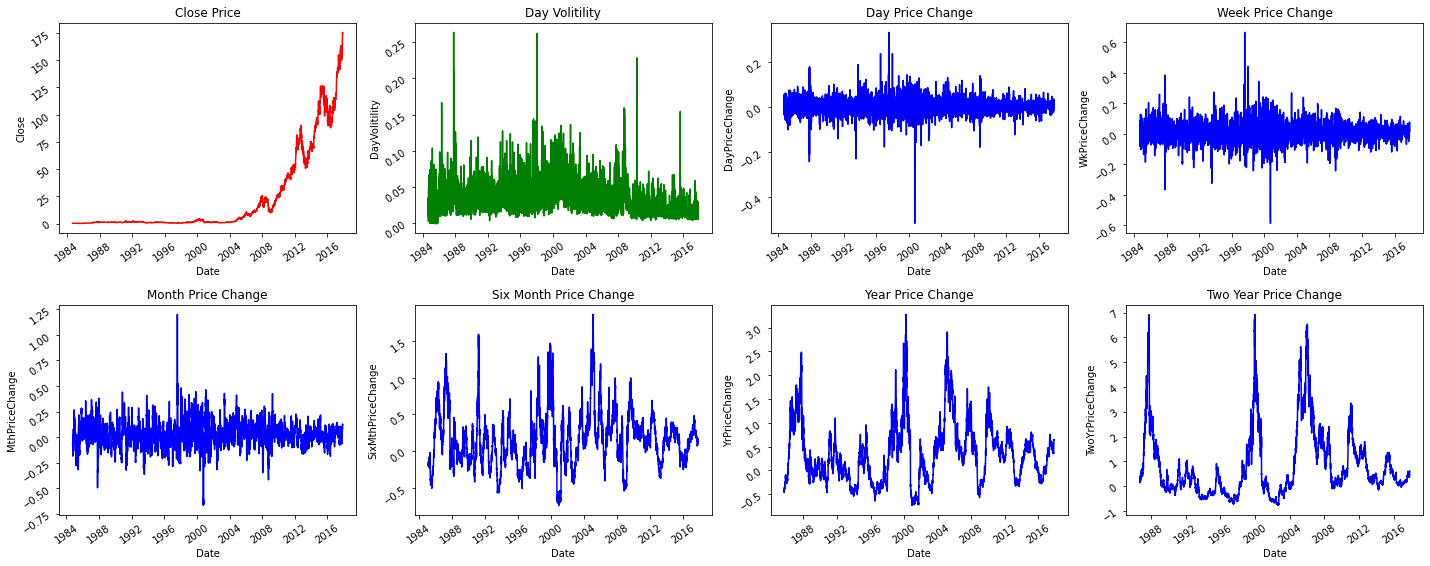

In [107]:
#Multi-data Charts

fig,ax =  plt.subplots( 2, 4,
                       figsize = ( 20, 8))
#0,0
sns.lineplot( x = "Date", y = "Close", 
             color = 'r', data = dataProcessed,
             ax = ax[0][0]).set(title = 'Close Price')

  
ax[0][0].tick_params(labelrotation = 35)
#0,1
sns.lineplot( x = "Date", y = "DayVolitility", 
             color = 'g', data = dataProcessed,
             ax = ax[0][1]).set(title = 'Day Volitility')
  
ax[0][1].tick_params(labelrotation = 35)
#0,2
sns.lineplot(x = "Date", y = "DayPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[0][2]).set(title = 'Day Price Change')
  
ax[0][2].tick_params(labelrotation = 35)
#0,3
sns.lineplot(x = "Date", y = "WkPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[0][3]).set(title = 'Week Price Change')
  
ax[0][3].tick_params(labelrotation = 35)
#1,0
sns.lineplot(x = "Date", y = "MthPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[1][0]).set(title = 'Month Price Change')
  
ax[1][0].tick_params(labelrotation = 35)
#1,1
sns.lineplot(x = "Date", y = "SixMthPriceChange", 
             color = 'b', data = dataProcessed, 
             ax = ax[1][1]).set(title = 'Six Month Price Change')
  
ax[1][1].tick_params(labelrotation = 35)
#1,2
sns.lineplot(x = "Date", y = "YrPriceChange", 
             color = 'b', data = dataProcessed, 
             ax = ax[1][2]).set(title = 'Year Price Change')
  
ax[1][2].tick_params(labelrotation = 35)
#1,3
sns.lineplot(x = "Date", y = "TwoYrPriceChange", 
             color = 'b', data = dataProcessed,
             ax = ax[1][3]).set(title = 'Two Year Price Change')
  
ax[1][3].tick_params(labelrotation = 35)
fig.tight_layout(pad = 1.2)

In [62]:
#sns.lineplot(x = "Date", y = "Close", data = dataProcessed)

#plt.ylabel("Close Price")
#plt.xticks(rotation = 25)


In [63]:
dataProcessed.describe()

Close        Volume  DayVolitility  DayPriceChange  \
count  8364.000000  8.364000e+03    8364.000000     8364.000000   
mean     22.281018  1.066416e+08       0.032377        0.001131   
std      37.764469  9.935187e+07       0.020253        0.028372   
min       0.230510  0.000000e+00      -0.000000       -0.518463   
25%       1.137100  4.384365e+07       0.018601       -0.013168   
50%       1.628250  7.481383e+07       0.028087        0.000000   
75%      23.694500  1.320534e+08       0.040685        0.014782   
max     175.610000  2.069770e+09       0.263679        0.332121   

       WkPriceChange  MthPriceChange  SixMthPriceChange  YrPriceChange  \
count    8096.000000     8069.000000        7960.000000    7966.000000   
mean        0.005158        0.022256           0.155445       0.343255   
std         0.061743        0.124743           0.375500       0.624632   
min        -0.587734       -0.670377          -0.741429      -0.739771   
25%        -0.028630       -0.049719          -0.089373      -0.141766   
50%         0.004699        0.019630           0.139870       0.266486   
75%         0.037948        0.094461           0.331751       0.648709   
max         0.663815        1.202038           1.862742       3.281065   

       TwoYrPriceChange  FutWkPriceChange  FutMthPriceChange  \
count       7676.000000       8101.000000        8089.000000   
mean           0.822125          0.005153           0.022102   
std            1.345676          0.061724           0.124565   
min           -0.774762         -0.587734          -0.670377   
25%           -0.034785         -0.028622          -0.049600   
50%            0.333806          0.004667           0.019138   
75%            1.353711          0.037943           0.093644   
max            6.931635          0.663815           1.202038   

       FutSixMthPriceChange  FutYrPriceChange  FutTwoYrPriceChange  
count           6597.000000       8218.000000          8184.000000  
mean               0.152032          0.326114             0.763935  
std                0.374668          0.618657             1.321469  
min               -0.747157         -0.739771            -0.774762  
25%               -0.085832         -0.124500             0.000000  
50%                0.130158          0.218480             0.233054  
75%                0.324787          0.634006             1.249135  
max                1.918374          3.281065             6.931635

In [64]:
dataProcessed

Date      Close    Volume  DayVolitility  DayPriceChange  \
0    1984-09-07    0.42388  23220030       0.023962        0.000000   
1    1984-09-10    0.42134  18022532       0.027049       -0.005992   
2    1984-09-11    0.42902  42498199       0.026381        0.018228   
3    1984-09-12    0.41618  37125801       0.035660       -0.029929   
4    1984-09-13    0.43927  57822062       0.002838        0.055481   
...         ...        ...       ...            ...             ...   
8359 2017-11-06  173.63000  34901241       0.018697        0.010182   
8360 2017-11-07  174.18000  24424877       0.006991        0.003168   
8361 2017-11-08  175.61000  24451166       0.010819        0.008210   
8362 2017-11-09  175.25000  29533086       0.016756       -0.002050   
8363 2017-11-10  174.67000  25130494       0.006329       -0.003310   

      WkPriceChange  MthPriceChange  SixMthPriceChange  YrPriceChange  \
0               NaN             NaN                NaN            NaN   
1               NaN             NaN                NaN            NaN   
2               NaN             NaN                NaN            NaN   
3               NaN             NaN                NaN            NaN   
4               NaN             NaN                NaN            NaN   
...             ...             ...                ...            ...   
8359       0.045208        0.118174           0.148043       0.597920   
8360       0.034139        0.121282           0.144340       0.593450   
8361       0.056047        0.125777           0.159218       0.609182   
8362       0.046206        0.127445           0.146924       0.652055   
8363       0.016232        0.116602           0.127412       0.636713   

      TwoYrPriceChange  FutWkPriceChange  FutMthPriceChange  \
0                  NaN          0.051382          -0.063438   
1                  NaN          0.085062          -0.057792   
2                  NaN          0.026805          -0.083586   
3                  NaN          0.036979          -0.082993   
4                  NaN         -0.014592          -0.137068   
...                ...               ...                ...   
8359          0.495908          0.000000           0.000000   
8360          0.549231          0.000000           0.000000   
8361          0.570892          0.000000           0.000000   
8362          0.573019          0.000000           0.000000   
8363          0.615072          0.000000           0.000000   

      FutSixMthPriceChange  FutYrPriceChange  FutTwoYrPriceChange  
0                      NaN         -0.435005             0.323488  
1                -0.127688         -0.422485             0.316039  
2                -0.191133         -0.426880             0.330940  
3                -0.166178         -0.406146             0.344851  
4                -0.177909         -0.413982             0.185831  
...                    ...               ...                  ...  
8359              0.000000          0.000000             0.000000  
8360              0.000000          0.000000             0.000000  
8361              0.000000          0.000000             0.000000  
8362              0.000000          0.000000             0.000000  
8363              0.000000          0.000000             0.000000  

[8364 rows x 15 columns]

In [65]:
dataProcessed.iloc[3196,4]

0.0017702248185520464

In [111]:
#Array Prototype:
#0:collumn High Total
#1:collumn High Count
#2:collumn Low Total
#3:collumn Low Count
#4:collumn Zero Count
#5:collumn Count (accounting for None values)

#0:row Day Change (7 in dataProcessed)
#1:row Week Change (8 in dataProcessed)
#2:row Month Change (9 in dataProcessed)
#3:row 6Month Change (10 in dataProcessed)
#4:row Year Change (11 in dataProcessed)
#5:row 2Year Change (12 in dataProcessed)


Change = [[0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0],
          [0,0,0,0,0,0]]

index = 0
dataIndex = -1
while nextValue == 1 and index <= len(dataProcessed.index) - 1:
    
    
    #DayChange
    SourceDataCol = 4
    DataRow = 0
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
    
    #WeekChange
    SourceDataCol = 5
    DataRow = 1
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
        
    #MonthChange
    SourceDataCol = 6
    DataRow = 2
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
    #6MonthChange
    SourceDataCol = 7
    DataRow = 3
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
    #YearChange
    SourceDataCol = 8
    DataRow = 4
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
        
    #2YearChange
    SourceDataCol = 9
    DataRow = 5
    if(dataProcessed.iloc[index, SourceDataCol] == None):
        #Skip This
        pass
    elif (dataProcessed.iloc[index, SourceDataCol] > 0):
        Change[DataRow][0] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][1] += 1
        Change[DataRow][5] += 1
    elif (dataProcessed.iloc[index, SourceDataCol] < 0):
        Change[DataRow][2] += dataProcessed.iloc[index, SourceDataCol]
        Change[DataRow][3] += 1
        Change[DataRow][5] += 1
    else:
        Change[DataRow][4] += 1
        Change[DataRow][5] += 1
    
    
    
    
    
    index += 1
        
print(Change)


[[86.01521125678748, 4141, -76.55902243835412, 3915, 308, 8364], [199.9242218241383, 4301, -158.16483146291375, 3693, 370, 8364], [470.8875910333379, 4620, -291.3000444306323, 3395, 349, 8364], [1828.8192709863752, 5115, -591.4781414648202, 2831, 418, 8364], [3466.4091919310854, 5284, -732.0430393709545, 2668, 412, 8364], [6970.630245841655, 5630, -660.0006553137042, 2044, 690, 8364]]


In [112]:
Change

[[86.01521125678748, 4141, -76.55902243835412, 3915, 308, 8364],
 [199.9242218241383, 4301, -158.16483146291375, 3693, 370, 8364],
 [470.8875910333379, 4620, -291.3000444306323, 3395, 349, 8364],
 [1828.8192709863752, 5115, -591.4781414648202, 2831, 418, 8364],
 [3466.4091919310854, 5284, -732.0430393709545, 2668, 412, 8364],
 [6970.630245841655, 5630, -660.0006553137042, 2044, 690, 8364]]

In [113]:
DataRow = 0
print("======================================================================")
print("Positive Day Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Day Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Day Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 1
print("Positive Week Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Week Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Week Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 2
print("Positive Month Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Month Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Month Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 3
print("Positive 6 Month Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative 6 Month Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) 6 Month Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 4
print("Positive Year Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative Year Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) Year Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("----------------------------------------------------------------------")
DataRow = 5
print("Positive 2 Year Average: " + str(round(((Change[DataRow][0]/Change[DataRow][1])*100), 4)) + "%")
print("Negative 2 Year Average: " + str(round(((Change[DataRow][2]/Change[DataRow][3])*100), 4)) + "%")
print("(Positive/Neutral/Negative) 2 Year Probability (" + str(round(((Change[DataRow][1]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][4]/Change[DataRow][5])*100), 4)) + "%/" + str(round(((Change[DataRow][3]/Change[DataRow][5])*100), 4)) + "%)")
print("======================================================================")

Positive Day Average: 2.0772%
Negative Day Average: -1.9555%
(Positive/Neutral/Negative) Day Probability (49.5098%/3.6824%/46.8077%)
----------------------------------------------------------------------
Positive Week Average: 4.6483%
Negative Week Average: -4.2828%
(Positive/Neutral/Negative) Week Probability (51.4228%/4.4237%/44.1535%)
----------------------------------------------------------------------
Positive Month Average: 10.1924%
Negative Month Average: -8.5803%
(Positive/Neutral/Negative) Month Probability (55.2367%/4.1726%/40.5906%)
----------------------------------------------------------------------
Positive 6 Month Average: 35.754%
Negative 6 Month Average: -20.8929%
(Positive/Neutral/Negative) 6 Month Probability (61.1549%/4.9976%/33.8474%)
----------------------------------------------------------------------
Positive Year Average: 65.602%
Negative Year Average: -27.4379%
(Positive/Neutral/Negative) Year Probability (63.1755%/4.9259%/31.8986%)
------------------------

In [69]:
#Check To see if data has unique Characteristics

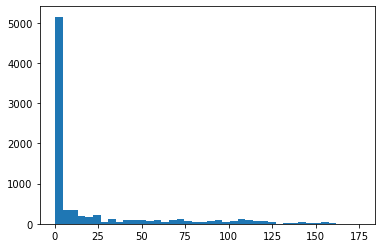

In [70]:
ax = plt.hist(data.Open, bins = 40)

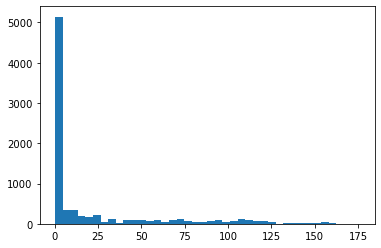

In [71]:
ax = plt.hist(data.High, bins = 40)

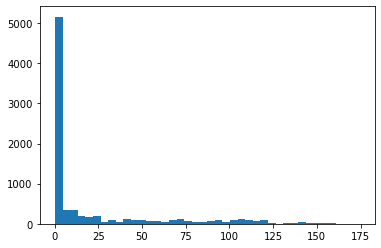

In [72]:
ax = plt.hist(data.Low, bins = 40)

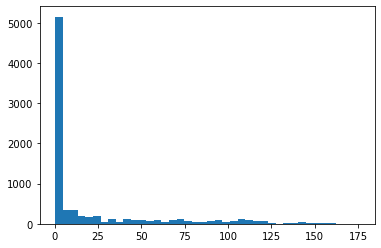

In [73]:
ax = plt.hist(data.Close, bins = 40)

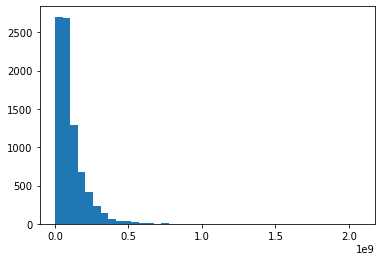

In [74]:
ax = plt.hist(data.Volume, bins = 40)

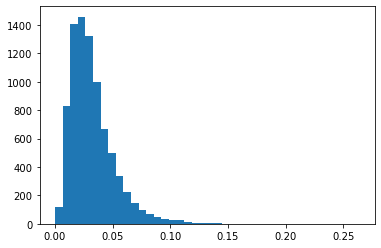

In [75]:
ax = plt.hist(data.DayVolitility, bins = 40)

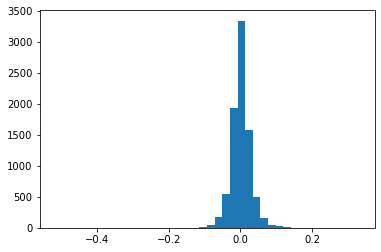

In [76]:
ax = plt.hist(data.DayPriceChange, bins = 40)

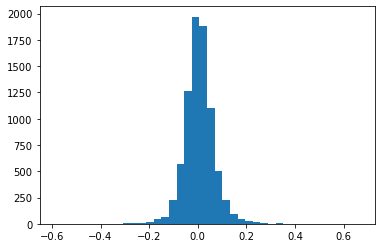

In [77]:
ax = plt.hist(data.WkPriceChange, bins = 40)

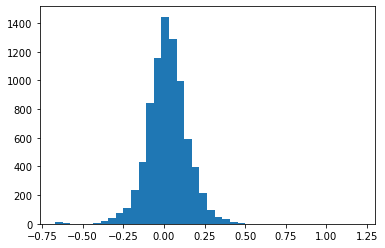

In [78]:
ax = plt.hist(data.MthPriceChange, bins = 40)

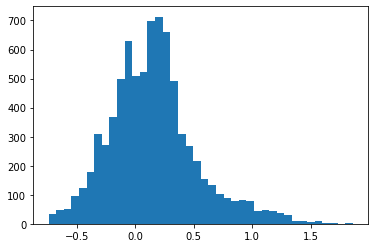

In [79]:
ax = plt.hist(data.SixMthPriceChange, bins = 40)

Text(0.5, 1.0, 'Frequency Of Annual Price Changes')

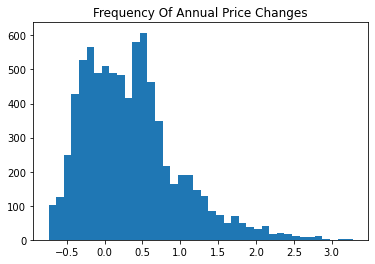

In [114]:
ax = plt.hist(data.YrPriceChange, bins = 40)
plt.title('Frequency Of Annual Price Changes')

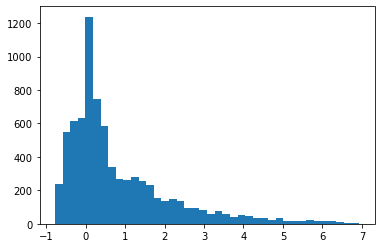

In [115]:
ax = plt.hist(data.TwoYrPriceChange, bins = 40)

In [82]:
#Data Collumns added retroactively:
#Future 1 year change
#Future 2 year change

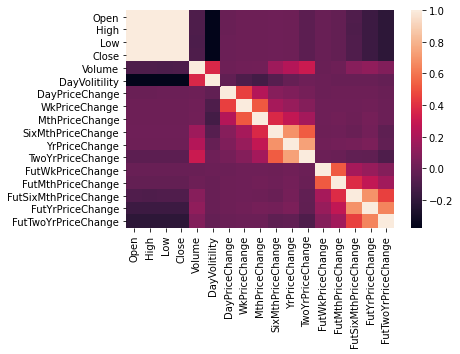

In [83]:
sns.heatmap(data.corr())
plt.show()

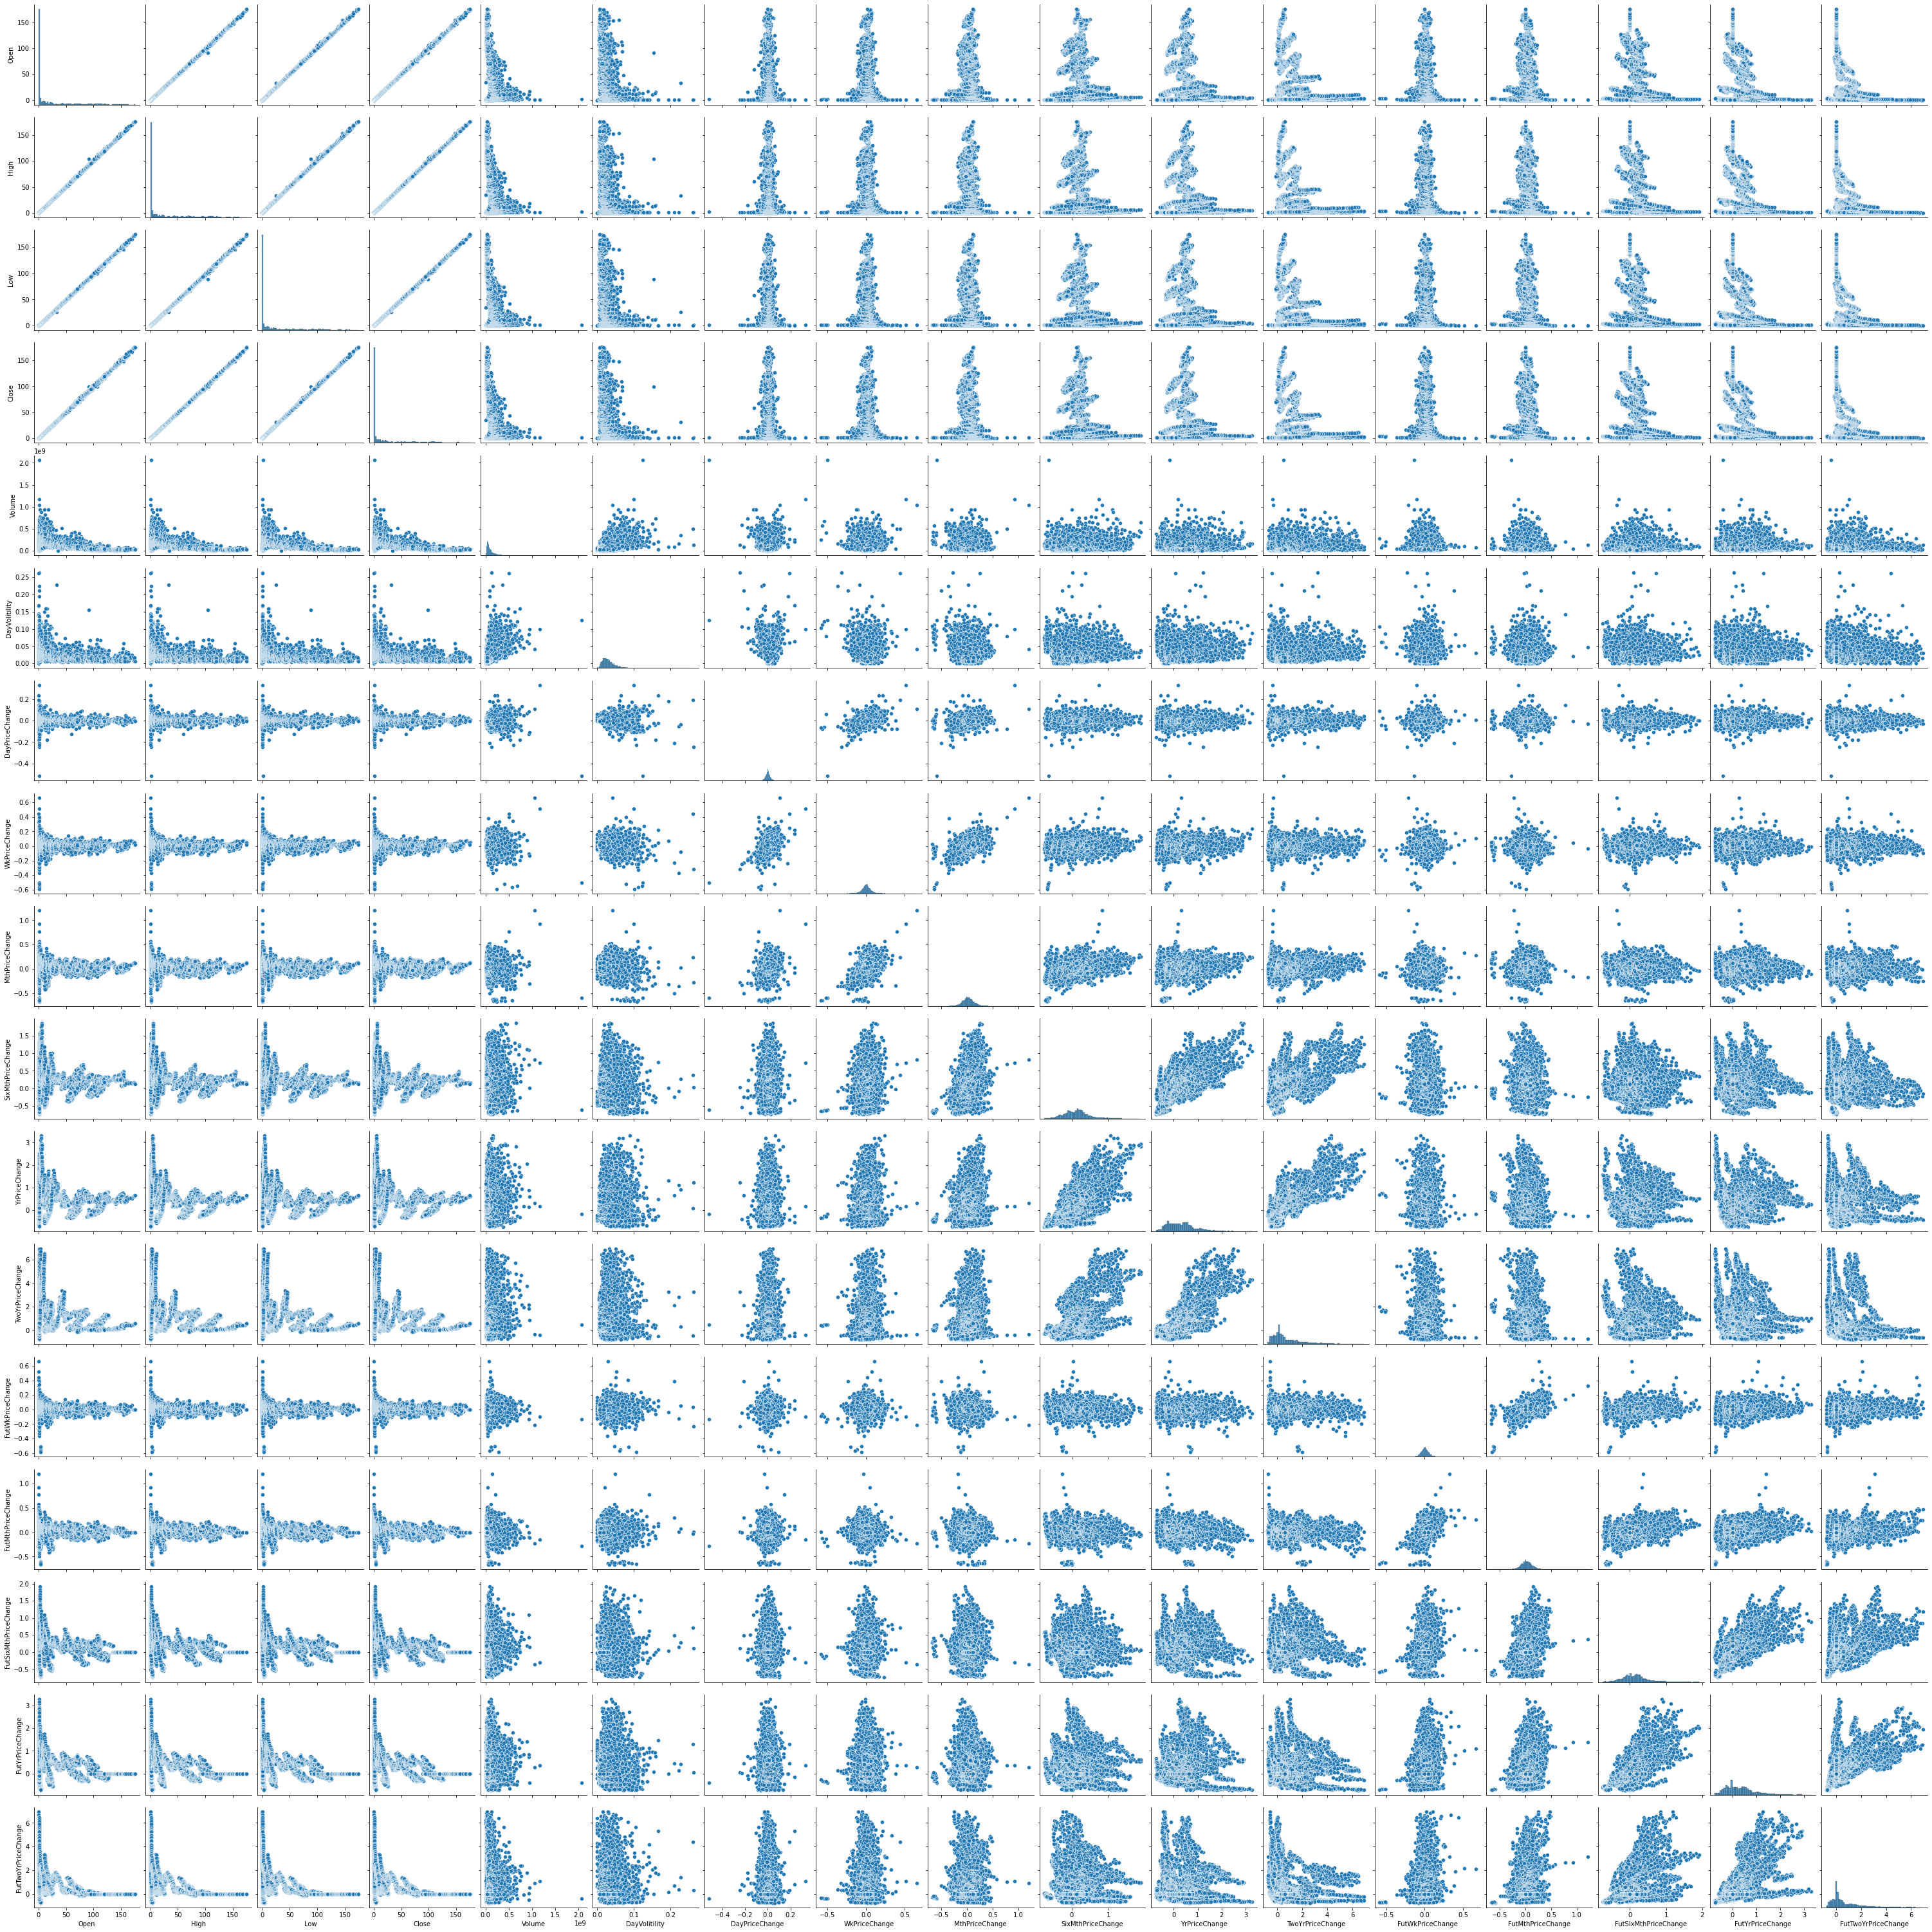

In [95]:

sns.pairplot(data)
plt.show()

In [86]:
#Export Data:
data.to_csv('Processed/aaplProcessed.csv')

In [65]:
#Import Data
read = pd.read_csv('Processed/aapl.usProcessed.csv')
read = read.drop(columns = 'Unnamed: 0')
read = pd.DataFrame(read)

In [66]:
#cut off last 2 years of data
read = read[read.FutTwoYrPriceChange != 0]
read = read.dropna()

In [67]:
#find the normalized value for 0

max_value = read['FutTwoYrPriceChange'].max()
min_value = read['FutTwoYrPriceChange'].min()
ZeroSplit = (0 - min_value) / (max_value - min_value)
ZeroSplit

0.10053496795700563

In [68]:

def normalize(df):
    result = df.copy()
    dataTypes = df.dtypes
    for feature_name in df.columns:
        if('int' in str(dataTypes[feature_name]) or 'float' in str(dataTypes[feature_name])):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
        else:
            result[feature_name] = df[feature_name]
    return result

read=normalize(read)

read

Date      Open      High       Low     Close    Volume  \
506   1986-09-09  0.001254  0.001316  0.001302  0.001402  0.035980   
507   1986-09-10  0.001391  0.001292  0.001314  0.001301  0.018057   
508   1986-09-11  0.001254  0.001134  0.000991  0.000955  0.032062   
510   1986-09-15  0.000912  0.000906  0.000923  0.001026  0.053150   
511   1986-09-16  0.001037  0.001192  0.000991  0.001267  0.058800   
...          ...       ...       ...       ...       ...       ...   
7627  2014-12-10  0.960558  0.959084  0.946545  0.940577  0.040256   
7628  2014-12-11  0.942485  0.950316  0.944745  0.937726  0.037470   
7630  2014-12-15  0.929130  0.931895  0.902179  0.908950  0.060719   
7631  2014-12-16  0.892715  0.919939  0.901549  0.896567  0.054850   
7632  2014-12-17  0.899303  0.917105  0.906319  0.919106  0.048247   

      DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
506        0.129973        0.474930       0.493381        0.381868   
507        0.104380        0.388891       0.477098        0.343817   
508        0.233367        0.302874       0.406069        0.307779   
510        0.112859        0.497210       0.432573        0.323898   
511        0.275126        0.512251       0.448476        0.349519   
...             ...             ...            ...             ...   
7627       0.094814        0.390622       0.442372        0.361527   
7628       0.067574        0.418014       0.442787        0.352328   
7630       0.165883        0.399020       0.439940        0.330956   
7631       0.120946        0.399694       0.418049        0.317626   
7632       0.089865        0.466735       0.451437        0.333622   

      SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
506            0.453024       0.512839          0.143479          0.448476   
507            0.445608       0.498500          0.145284          0.450904   
508            0.407834       0.438544          0.124649          0.503198   
510            0.390114       0.475760          0.120863          0.519921   
511            0.398274       0.503458          0.134522          0.499071   
...                 ...            ...               ...               ...   
7627           0.363052       0.289827          0.168270          0.451437   
7628           0.369506       0.289275          0.171135          0.476940   
7630           0.355613       0.280328          0.169079          0.504548   
7631           0.350038       0.277178          0.160869          0.512936   
7632           0.360776       0.288419          0.168428          0.488582   

      FutMthPriceChange  FutSixMthPriceChange  FutYrPriceChange  \
506            0.317435              0.600208          0.630912   
507            0.322340              0.603047          0.685881   
508            0.364897              0.635729          0.757022   
510            0.382671              0.663835          0.733270   
511            0.345442              0.615511          0.676606   
...                 ...                   ...               ...   
7627           0.337973              0.339485          0.196468   
7628           0.359342              0.336043          0.198506   
7630           0.363137              0.351131          0.198187   
7631           0.375469              0.356189          0.197078   
7632           0.359936              0.347128          0.192652   

      FutTwoYrPriceChange  
506              0.253614  
507              0.254571  
508              0.279846  
510              0.292872  
511              0.277170  
...                   ...  
7627             0.104563  
7628             0.106282  
7630             0.112024  
7631             0.116343  
7632             0.112787  

[4598 rows x 18 columns]

In [69]:
#Future is above average:
#Future 2 year: column 17
countAboveAvg = 0
countBelowAvg = 0
index = 0
FutAboveAverage = [None] * len(read.index)
Average = read['FutTwoYrPriceChange'].mean()
while (index < len(read)):
    if(read.iloc[index, 17] > Average):
        FutAboveAverage[index] = True
        countAboveAvg += 1
    elif(read.iloc[index, 17] <= Average):
        FutAboveAverage[index] = False
        countBelowAvg += 1
    else:
        FutAboveAverage[index] = None
    
    index += 1
read['FutAboveAverage'] = FutAboveAverage

In [70]:
#Future is positive
#Future 2 year: column 17
#using ZeroSplit as an ajusted 0 value relative to the normalization

countAbove = 0
countBelow = 0
index = 0
FutPositive = [None] * len(read.index)
while (index < len(read)):
    if(read.iloc[index, 17] > ZeroSplit):
        FutPositive[index] = True
        countAbove += 1
    elif(read.iloc[index, 17] <= ZeroSplit):
        FutPositive[index] = False
        countBelow += 1
    else:
        FutPositive[index] = None
    
    index += 1
read['FutPositive'] = FutPositive

In [71]:
print(Average)

0.19536488425504347


In [72]:
read.groupby('FutAboveAverage').size()

FutAboveAverage
False    3015
True     1583
dtype: int64

In [73]:
read.groupby('FutPositive').size()

FutPositive
False    1349
True     3249
dtype: int64

In [74]:
read

Date      Open      High       Low     Close    Volume  \
506   1986-09-09  0.001254  0.001316  0.001302  0.001402  0.035980   
507   1986-09-10  0.001391  0.001292  0.001314  0.001301  0.018057   
508   1986-09-11  0.001254  0.001134  0.000991  0.000955  0.032062   
510   1986-09-15  0.000912  0.000906  0.000923  0.001026  0.053150   
511   1986-09-16  0.001037  0.001192  0.000991  0.001267  0.058800   
...          ...       ...       ...       ...       ...       ...   
7627  2014-12-10  0.960558  0.959084  0.946545  0.940577  0.040256   
7628  2014-12-11  0.942485  0.950316  0.944745  0.937726  0.037470   
7630  2014-12-15  0.929130  0.931895  0.902179  0.908950  0.060719   
7631  2014-12-16  0.892715  0.919939  0.901549  0.896567  0.054850   
7632  2014-12-17  0.899303  0.917105  0.906319  0.919106  0.048247   

      DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
506        0.129973        0.474930       0.493381        0.381868   
507        0.104380        0.388891       0.477098        0.343817   
508        0.233367        0.302874       0.406069        0.307779   
510        0.112859        0.497210       0.432573        0.323898   
511        0.275126        0.512251       0.448476        0.349519   
...             ...             ...            ...             ...   
7627       0.094814        0.390622       0.442372        0.361527   
7628       0.067574        0.418014       0.442787        0.352328   
7630       0.165883        0.399020       0.439940        0.330956   
7631       0.120946        0.399694       0.418049        0.317626   
7632       0.089865        0.466735       0.451437        0.333622   

      SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutWkPriceChange  \
506            0.453024       0.512839          0.143479          0.448476   
507            0.445608       0.498500          0.145284          0.450904   
508            0.407834       0.438544          0.124649          0.503198   
510            0.390114       0.475760          0.120863          0.519921   
511            0.398274       0.503458          0.134522          0.499071   
...                 ...            ...               ...               ...   
7627           0.363052       0.289827          0.168270          0.451437   
7628           0.369506       0.289275          0.171135          0.476940   
7630           0.355613       0.280328          0.169079          0.504548   
7631           0.350038       0.277178          0.160869          0.512936   
7632           0.360776       0.288419          0.168428          0.488582   

      FutMthPriceChange  FutSixMthPriceChange  FutYrPriceChange  \
506            0.317435              0.600208          0.630912   
507            0.322340              0.603047          0.685881   
508            0.364897              0.635729          0.757022   
510            0.382671              0.663835          0.733270   
511            0.345442              0.615511          0.676606   
...                 ...                   ...               ...   
7627           0.337973              0.339485          0.196468   
7628           0.359342              0.336043          0.198506   
7630           0.363137              0.351131          0.198187   
7631           0.375469              0.356189          0.197078   
7632           0.359936              0.347128          0.192652   

      FutTwoYrPriceChange  FutAboveAverage  FutPositive  
506              0.253614             True         True  
507              0.254571             True         True  
508              0.279846             True         True  
510              0.292872             True         True  
511              0.277170             True         True  
...                   ...              ...          ...  
7627             0.104563            False         True  
7628             0.106282            False         True  
7630             0.112024            False         True  
7631    

In [75]:
#Cut out other prediction collumns
data_baseline = read.drop(['Date', 'Open', 'High', 'Low', 'Close', 'FutWkPriceChange', 'FutMthPriceChange', 'FutSixMthPriceChange', 'FutYrPriceChange', 'FutTwoYrPriceChange'],  axis=1)
#data_baseline = read.drop(['Date', 'FutWkPriceChange', 'FutMthPriceChange', 'FutSixMthPriceChange', 'FutYrPriceChange', 'FutTwoYrPriceChange'],  axis=1)

In [76]:
data_baseline

Volume  DayVolitility  DayPriceChange  WkPriceChange  MthPriceChange  \
506   0.035980       0.129973        0.474930       0.493381        0.381868   
507   0.018057       0.104380        0.388891       0.477098        0.343817   
508   0.032062       0.233367        0.302874       0.406069        0.307779   
510   0.053150       0.112859        0.497210       0.432573        0.323898   
511   0.058800       0.275126        0.512251       0.448476        0.349519   
...        ...            ...             ...            ...             ...   
7627  0.040256       0.094814        0.390622       0.442372        0.361527   
7628  0.037470       0.067574        0.418014       0.442787        0.352328   
7630  0.060719       0.165883        0.399020       0.439940        0.330956   
7631  0.054850       0.120946        0.399694       0.418049        0.317626   
7632  0.048247       0.089865        0.466735       0.451437        0.333622   

      SixMthPriceChange  YrPriceChange  TwoYrPriceChange  FutAboveAverage  \
506            0.453024       0.512839          0.143479             True   
507            0.445608       0.498500          0.145284             True   
508            0.407834       0.438544          0.124649             True   
510            0.390114       0.475760          0.120863             True   
511            0.398274       0.503458          0.134522             True   
...                 ...            ...               ...              ...   
7627           0.363052       0.289827          0.168270            False   
7628           0.369506       0.289275          0.171135            False   
7630           0.355613       0.280328          0.169079            False   
7631           0.350038       0.277178          0.160869            False   
7632           0.360776       0.288419          0.168428            False   

      FutPositive  
506          True  
507          True  
508          True  
510          True  
511          True  
...           ...  
7627         True  
7628         True  
7630         True  
7631         True  
7632         True  

[4598 rows x 10 columns]

In [77]:
#Get Source Data isolated
x_data = data_baseline.drop(['FutPositive', 'FutAboveAverage'], axis=1)
x_data = x_data.values

In [78]:
#######Future Above Average################

In [79]:
#Get Target Data Isolated

y_data = data_baseline[['FutAboveAverage']]
y_data = y_data.values.flatten()


In [80]:
#Split Test Sets
#85/15
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


In [81]:
#Run Model for Above Average
modelLogReg = LogisticRegression(solver='liblinear')
modelLogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [82]:
#Analyse Model for Above Average
y_pred = modelLogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelLogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[410  35]
 [217  28]]


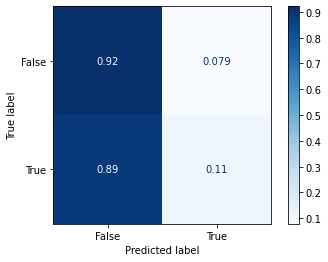

In [92]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelLogReg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.65      0.92      0.76       445
        True       0.44      0.11      0.18       245

    accuracy                           0.63       690
   macro avg       0.55      0.52      0.47       690
weighted avg       0.58      0.63      0.56       690



In [98]:
#Try Decision Tree

In [99]:
#Run Model for Above Average
modelDTree = tree.DecisionTreeClassifier(criterion='entropy')
modelDTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [100]:
#Analyse Model for Above Average
y_pred = modelDTree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelDTree.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


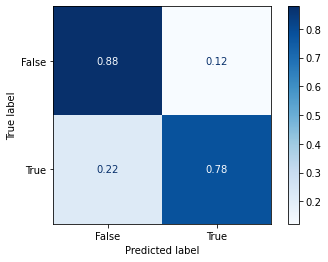

In [101]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelDTree, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.88      0.88       445
        True       0.78      0.78      0.78       245

    accuracy                           0.84       690
   macro avg       0.83      0.83      0.83       690
weighted avg       0.84      0.84      0.84       690



In [103]:
ModelRandoClass = RandomForestClassifier()
ModelRandoClass.fit(X_train, y_train)

y_pred_rf = ModelRandoClass.predict(X_test)

In [104]:
ModelRandoClass.score(X_test,y_test)

0.8942028985507247

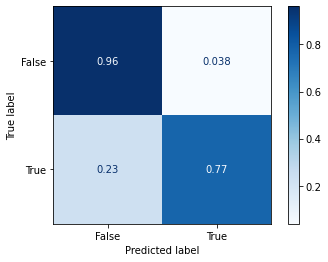

In [105]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(ModelRandoClass, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [106]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.88      0.96      0.92       445
        True       0.92      0.77      0.84       245

    accuracy                           0.89       690
   macro avg       0.90      0.87      0.88       690
weighted avg       0.90      0.89      0.89       690



In [107]:
######################Future Positive###################################

In [108]:
#Get Target Data Isolated
y_data = data_baseline[['FutPositive']]
y_data = y_data.values.flatten()

In [109]:
#Split Test Sets
#85/15
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [110]:
#Run Model for Above Average
modelLogReg = LogisticRegression(solver='liblinear')
modelLogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [111]:
#Analyse Model for Above Average
y_pred = modelLogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelLogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


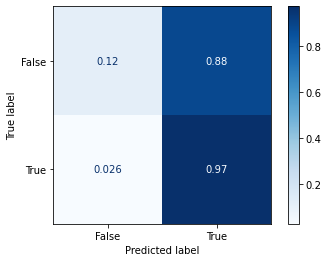

In [114]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelLogReg, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.64      0.12      0.20       195
        True       0.74      0.97      0.84       495

    accuracy                           0.73       690
   macro avg       0.69      0.55      0.52       690
weighted avg       0.71      0.73      0.66       690



In [116]:
#Try Decision Tree

In [117]:
#Run Model for Above Average
modelDTree = tree.DecisionTreeClassifier(criterion='entropy')
modelDTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [118]:
#Analyse Model for Above Average
y_pred = modelDTree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(modelDTree.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


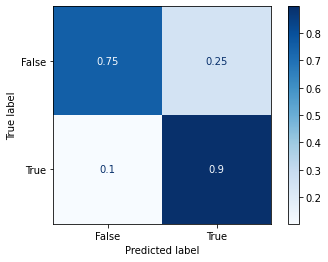

In [119]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(modelDTree, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.74      0.75      0.75       195
        True       0.90      0.90      0.90       495

    accuracy                           0.86       690
   macro avg       0.82      0.83      0.82       690
weighted avg       0.86      0.86      0.86       690



In [121]:
ModelRandoClass = RandomForestClassifier()
ModelRandoClass.fit(X_train, y_train)

y_pred_rf = ModelRandoClass.predict(X_test)

In [122]:
ModelRandoClass.score(X_test,y_test)

0.8956521739130435

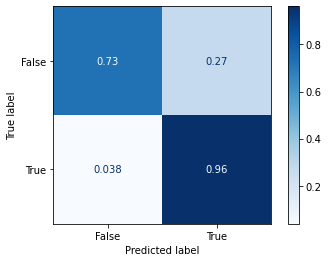

In [123]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(ModelRandoClass, X_test, y_test,
                                 #display_labels=y.value_counts().index,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [124]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.88      0.73      0.80       195
        True       0.90      0.96      0.93       495

    accuracy                           0.90       690
   macro avg       0.89      0.84      0.86       690
weighted avg       0.89      0.90      0.89       690

